## Final Project Submission

Please fill out:
* Student name: Andi Osika
* Student pace:  part time 
* Scheduled project review date/time: 
* Instructor name: James Irving
* Blog post URL:


# Project Description:

The dataset for this project was provided to us: "kc_house_data.csv", to explore and model with multivariate linear regression to predict the sale price of houses as accurately as possible. 



# Obtain: Import Tools /  Data

This particular dataset was provided for this project and included

In [1]:
##import necessary tools and data

!pip install -U fsds_100719
from fsds_100719.imports import *
##Loads 
#Handle	Package	Description
#dp	IPython.display	Display modules with helpful display and clearing commands.
#fs	fsds_100719	Custom data science bootcamp student package
#mpl	matplotlib	Matplotlib's base OOP module with formatting artists
#plt	matplotlib.pyplot	Matplotlib's matlab-like plotting module
#np	numpy	scientific computing with Python
#pd	pandas	High performance data structures and tools
#sns	seaborn	High-level data visualization library based on matplotlib

kc = pd.read_csv("kc_house_data.csv")


In [2]:
import scipy.stats as stats


In [3]:
pd.set_option('display.max_columns',0)

# Examine the Data

### Initial examination 

In [4]:
kc.head()

id        date     price  ...     long  sqft_living15  sqft_lot15
0  7129300520  10/13/2014  221900.0  ... -122.257           1340        5650
1  6414100192   12/9/2014  538000.0  ... -122.319           1690        7639
2  5631500400   2/25/2015  180000.0  ... -122.233           2720        8062
3  2487200875   12/9/2014  604000.0  ... -122.393           1360        5000
4  1954400510   2/18/2015  510000.0  ... -122.045           1800        7503

[5 rows x 21 columns]

In [5]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


## Observations and Initial Background Research:
Upon initial inspection, one can determine this dataset contains 21 columns/features containing various types of values in each ranging from objects, to numeric both as integers and floats.  Some columns that are labeled year are carrying values as float and integers and will need to be converted. Out of the 21,597 rows of data, there are a three missing values including:

    -waterfront
    -view
    -yr_renovated

The next step would be to further inspect the values in each column to validate assumptions and determine what the corresponding values indicate or measure.

By doing a quick search on the zip codes and title of the file one can determine that this is a dataset for real estate information in King County, Washington.  This county includes Washington state's largest cities including Seattle, Kirkland, Renton, Bellevue as well as some small and remote areas including islands and those in mountain ranges.

Also looked here for some initial background: https://www.kingcounty.gov/depts/assessor.aspx

### Background on King County:
King County is home to Washington's largest cities including Seattle, Kirkland, Renton, Bellevue as well as vast rural 
rural communities including islands and those in mountain ranges.  Tech and retail are big industries in king county https://datausa.io/profile/geo/king-county-wa#housing as well as health care.  There is plenty of art and culture in these urban areas and the vast rural areas offer many activities making King County a desirable place to live. Median houshold income was around $75K in 2014-2015.

Map with King County: https://localscape.spatialest.com/#kingcountyassessor/Tax


In [6]:
# Further inspecting the data:
kc.describe()

id         price  ...  sqft_living15     sqft_lot15
count  2.159700e+04  2.159700e+04  ...   21597.000000   21597.000000
mean   4.580474e+09  5.402966e+05  ...    1986.620318   12758.283512
std    2.876736e+09  3.673681e+05  ...     685.230472   27274.441950
min    1.000102e+06  7.800000e+04  ...     399.000000     651.000000
25%    2.123049e+09  3.220000e+05  ...    1490.000000    5100.000000
50%    3.904930e+09  4.500000e+05  ...    1840.000000    7620.000000
75%    7.308900e+09  6.450000e+05  ...    2360.000000   10083.000000
max    9.900000e+09  7.700000e+06  ...    6210.000000  871200.000000

[8 rows x 19 columns]

## Looked at variables to gain insight to their meaning:  https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r


Some variables weren't searchable  (go back and cross reference put an ** next to assumed

id - Unique ID for each home sold

date - Date of the home sale

price - Price of each home sold

bedrooms - Number of bedrooms

bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower

sqft_living - Square footage of the apartments interior living space

sqft_lot - Square footage of the land space

floors - Number of floors

  X waterfront - A binary variable that seems to be proven not applicable only .06% of this was marked as a true value

view - An index assigned on a scale from 0 to 4 of how good the view of the property

condition - An index from 1 to 5 on the condition of the apartment,

grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design. Classification by construction quality which refers to the types of materials used and the quality of workmanship. Buildings of better quality (higher grade) cost more to build per unit of measure and command higher value. (See Glossary in Area Report for Residential Building Grades in use by the King County Department of Assessments.)

sqft_above - The square footage of the interior housing space that is above ground level

sqft_basement - The square footage of the interior housing space that is below ground level

yr_built - The year the house was initially built

   X yr_renovated - The year of the house’s last renovation

zipcode - What zipcode area the house is in

lat - Lattitude

long - Longitude

sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors


In [7]:
kc['date'].describe()

count         21597
unique          372
top       6/23/2014
freq            142
Name: date, dtype: object

## Initial thoughts and questions:
   1) Is latitude and longitude redundant for location with zip code? What will be the best way to show location a factor in predicting price?
   
   2) Age of the home vs renovation? How would I deal with that? Not all homes are renovated - how many homes out of 21K are renovated
  

## Function to help investigate specific columns

In [8]:
def check_column(df, col_name, n_unique=10):
    """Displays info on null values, datatype, unqiue values
    and displays .describe()
    
    Args:
        df (df): contains the columns
        col_name (str): name of the df column to show
        n_unique (int): Number of unique values top show.
    
    Return:
        fig, ax (Matplotlib Figure and Axes)
    """
    
    print('DataType:')
    print('\t',df[col_name].dtypes)
    
    num_nulls = df[col_name].isna().sum()
    print(f'Null Values Present = {num_nulls}')
    
    display(df[col_name].describe().round(3))
    
    print('\nValue Counts:')
    display(df[col_name].value_counts(n_unique)) 
    
 
    
    ## Add some EDA figures
    fig, ax = plt.subplots(ncols=2);
    
    df[col_name].hist(ax=ax[0])
    ax[1].scatter(df[col_name], kc['price'])
    
    return fig,ax

#check_column(df,'condition')

# SCRUB: Initial Data Cleaning

In [9]:
display(kc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


None

### Converting some of the data from objects into useable data:

In [10]:
## Initial changes to convert objects into useable data:

# 1) date from object to date time:
kc['date'] = pd.to_datetime(kc['date'])

# 2) date from int to date time:

kc['yr_built'] = pd.to_datetime(kc['yr_built'], format=('%Y'))

# 3) change sqft_basement to into numeric value
kc['sqft_basement'] = pd.to_numeric(kc['sqft_basement'],errors='coerce')


### Cleaning and examining the feature:  Renovations - further exploration:  

#### Addressing renovations by adding a cloumn: last_upgrade to illustrate when a home had been most recently upgraded to address the idea that not all homes are renovated.

Observations: only a small amount of homes were renovated out of 21K .03%  indicating that the trend is not to renovate or it's not accurately recorded.

In [11]:
kc.head()

id       date     price  ...     long  sqft_living15  sqft_lot15
0  7129300520 2014-10-13  221900.0  ... -122.257           1340        5650
1  6414100192 2014-12-09  538000.0  ... -122.319           1690        7639
2  5631500400 2015-02-25  180000.0  ... -122.233           2720        8062
3  2487200875 2014-12-09  604000.0  ... -122.393           1360        5000
4  1954400510 2015-02-18  510000.0  ... -122.045           1800        7503

[5 rows x 21 columns]

In [12]:
#filling in null values for yr_renovated
kc['yr_renovated'].fillna(0, inplace=True)

In [13]:
#dropping decimals from yr_renovated using math.trunc()
import math
kc['yr_reno'] = kc['yr_renovated'].apply(lambda x:math.trunc(x))

#### notes added to heading above:

Only 70 homes renovated out of 21K?  That's .03%...either this is a true trend that renovations don't happen OR it's not properly captured in this dataset. Also, no correlation

DataType:
	 int64
Null Values Present = 0


count    21597.000
mean        68.758
std        364.037
min          0.000
25%          0.000
50%          0.000
75%          0.000
max       2015.000
Name: yr_reno, dtype: float64


Value Counts:


0       0.965551
2014    0.003380
2003    0.001435
2013    0.001435
2007    0.001389
          ...   
1976    0.000046
1953    0.000046
1951    0.000046
1946    0.000046
1944    0.000046
Name: yr_reno, Length: 70, dtype: float64

(<Figure size 432x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E0C03DBA90>,
       dtype=object))

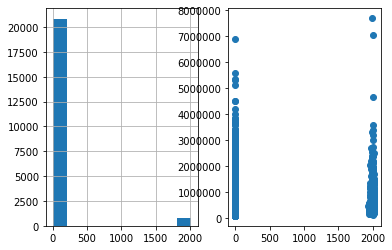

In [14]:
check_column(kc, 'yr_reno')

In [15]:
kc.head()

id       date     price  ...  sqft_living15  sqft_lot15  yr_reno
0  7129300520 2014-10-13  221900.0  ...           1340        5650        0
1  6414100192 2014-12-09  538000.0  ...           1690        7639     1991
2  5631500400 2015-02-25  180000.0  ...           2720        8062        0
3  2487200875 2014-12-09  604000.0  ...           1360        5000        0
4  1954400510 2015-02-18  510000.0  ...           1800        7503        0

[5 rows x 22 columns]

In [16]:
type(kc['yr_built'])

pandas.core.series.Series

In [17]:
#converting yr_built to a usable data:
kc['yr_built'] = kc['yr_built'].apply(lambda x: x.year)

In [18]:
kc.head()

id       date     price  ...  sqft_living15  sqft_lot15  yr_reno
0  7129300520 2014-10-13  221900.0  ...           1340        5650        0
1  6414100192 2014-12-09  538000.0  ...           1690        7639     1991
2  5631500400 2015-02-25  180000.0  ...           2720        8062        0
3  2487200875 2014-12-09  604000.0  ...           1360        5000        0
4  1954400510 2015-02-18  510000.0  ...           1800        7503        0

[5 rows x 22 columns]

#### Adding a feature 'last_upgrade' that addresses the last time the house was modified - either built or renovated:

In [19]:
kc['last_upgrade'] = np.where(kc['yr_reno']==0, kc['yr_built'], kc['yr_reno'])

In [20]:
kc.head()

id       date     price  ...  sqft_lot15  yr_reno  last_upgrade
0  7129300520 2014-10-13  221900.0  ...        5650        0          1955
1  6414100192 2014-12-09  538000.0  ...        7639     1991          1991
2  5631500400 2015-02-25  180000.0  ...        8062        0          1933
3  2487200875 2014-12-09  604000.0  ...        5000        0          1965
4  1954400510 2015-02-18  510000.0  ...        7503        0          1987

[5 rows x 23 columns]

#### Adding a feature 'yrs_since_last_upgrade' to simplify / visualize if age or time since last upgrade has correlation:

no correlation:

In [21]:
kc['yrs_since_last_upgrade'] = 2019 - kc['last_upgrade']

DataType:
	 int64
Null Values Present = 0


count    21597.000
mean        46.055
std         28.945
min          4.000
25%         20.000
50%         42.000
75%         65.000
max        119.000
Name: yrs_since_last_upgrade, dtype: float64


Value Counts:


5      0.029263
14     0.022179
13     0.021901
15     0.021068
16     0.020836
         ...   
118    0.001296
117    0.001204
86     0.001111
84     0.000926
85     0.000695
Name: yrs_since_last_upgrade, Length: 116, dtype: float64

(<Figure size 432x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E0C02CFB70>,
       dtype=object))

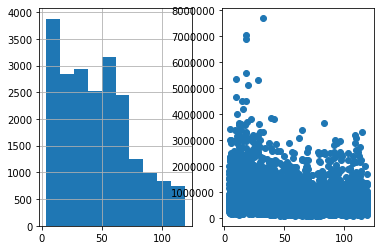

In [22]:
check_column(kc, 'yrs_since_last_upgrade')

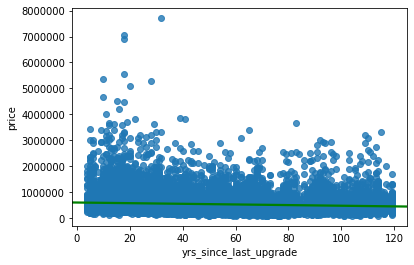

In [23]:
sns.regplot(kc['yrs_since_last_upgrade'], kc['price'],line_kws={"color": "green"})

In [24]:
kc.head()

id       date  ...  last_upgrade  yrs_since_last_upgrade
0  7129300520 2014-10-13  ...          1955                      64
1  6414100192 2014-12-09  ...          1991                      28
2  5631500400 2015-02-25  ...          1933                      86
3  2487200875 2014-12-09  ...          1965                      54
4  1954400510 2015-02-18  ...          1987                      32

[5 rows x 24 columns]

### Another look: 

In [25]:
kc.head(10)

id       date  ...  last_upgrade  yrs_since_last_upgrade
0  7129300520 2014-10-13  ...          1955                      64
1  6414100192 2014-12-09  ...          1991                      28
2  5631500400 2015-02-25  ...          1933                      86
3  2487200875 2014-12-09  ...          1965                      54
4  1954400510 2015-02-18  ...          1987                      32
5  7237550310 2014-05-12  ...          2001                      18
6  1321400060 2014-06-27  ...          1995                      24
7  2008000270 2015-01-15  ...          1963                      56
8  2414600126 2015-04-15  ...          1960                      59
9  3793500160 2015-03-12  ...          2003                      16

[10 rows x 24 columns]

In [26]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 24 columns):
id                        21597 non-null int64
date                      21597 non-null datetime64[ns]
price                     21597 non-null float64
bedrooms                  21597 non-null int64
bathrooms                 21597 non-null float64
sqft_living               21597 non-null int64
sqft_lot                  21597 non-null int64
floors                    21597 non-null float64
waterfront                19221 non-null float64
view                      21534 non-null float64
condition                 21597 non-null int64
grade                     21597 non-null int64
sqft_above                21597 non-null int64
sqft_basement             21143 non-null float64
yr_built                  21597 non-null int64
yr_renovated              21597 non-null float64
zipcode                   21597 non-null int64
lat                       21597 non-null float64
long                

In [27]:
kc.index[200]

200

## Looking for duplicates:

In [28]:
duplicates = kc[kc.duplicated()]
print(len(duplicates))
duplicates.head()

0


Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15, yr_reno, last_upgrade, yrs_since_last_upgrade]
Index: []

## Dealing with Null Values
    
    Dropping null values found in view and sqft_basement since they are relatively small amounts of data at .02% and 2% respectively.

In [29]:
## Looking for null values:
nulls = kc.isnull().sum()
print(nulls[nulls > 0])

waterfront       2376
view               63
sqft_basement     454
dtype: int64


In [30]:
#Examining missing data in terms of percentages
kc.isnull().sum() / len(kc.index)

id                        0.000000
date                      0.000000
price                     0.000000
bedrooms                  0.000000
bathrooms                 0.000000
sqft_living               0.000000
sqft_lot                  0.000000
floors                    0.000000
waterfront                0.110015
view                      0.002917
condition                 0.000000
grade                     0.000000
sqft_above                0.000000
sqft_basement             0.021021
yr_built                  0.000000
yr_renovated              0.000000
zipcode                   0.000000
lat                       0.000000
long                      0.000000
sqft_living15             0.000000
sqft_lot15                0.000000
yr_reno                   0.000000
last_upgrade              0.000000
yrs_since_last_upgrade    0.000000
dtype: float64

### Dropping the null values 'view' and 'sft_basement' since they are  @.02%, and 2% respectively is appropriate and preserves a good majority of overall data.

In [31]:
#it wold be acceptable to drop values for view and sft_basement since they are insignificant @.02%, and 2% respectively
kc.dropna(subset= ['view'], inplace=True)
kc.dropna(subset=['sqft_basement'], inplace=True)

## Dropping the variable "waterfront" based on the fact that only .06% of this data was populated with a binary value of 1 for this field.  Considering that King County sits on many bodies of water, including Puget Sound, 33 lakes and multiple rivers https://en.wikipedia.org/wiki/Category:Lakes_of_King_County,_Washington 

This data may have been incorrectly recorded or is describing a very small set of data that does not apply to the data as a whole.


In [32]:
##next missing value set: watherfront
kc['waterfront'].describe()

count    18749.000000
mean         0.007520
std          0.086396
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: waterfront, dtype: float64

'waterfront' appears to be a binary value, so it wouldn't make sense to fill value with mean.
It might make sense to populate with zeros since if a property was 'waterfront', it would be marked as such. Since it tends to be more than 10% of the data, exploring further to see if there are any contextual clues that may indicate 'waterfront'

In [33]:
kc['waterfront'].value_counts() / len(kc.index)

0.0    0.882649
1.0    0.006688
Name: waterfront, dtype: float64

In [34]:
#dropping the waterfront column
kc.drop('waterfront', axis=1, inplace=True)

In [35]:
##all null values are clear
kc.isnull().sum()

id                        0
date                      0
price                     0
bedrooms                  0
bathrooms                 0
sqft_living               0
sqft_lot                  0
floors                    0
view                      0
condition                 0
grade                     0
sqft_above                0
sqft_basement             0
yr_built                  0
yr_renovated              0
zipcode                   0
lat                       0
long                      0
sqft_living15             0
sqft_lot15                0
yr_reno                   0
last_upgrade              0
yrs_since_last_upgrade    0
dtype: int64

# Explore: Further Data Inspection

Checking for duplicates, categorical and numeric data types

In [36]:
kc.describe()

id         price  ...  last_upgrade  yrs_since_last_upgrade
count  2.108200e+04  2.108200e+04  ...  21082.000000            21082.000000
mean   4.582793e+09  5.402469e+05  ...   1972.950005               46.049995
std    2.876423e+09  3.667323e+05  ...     28.905522               28.905522
min    1.000102e+06  7.800000e+04  ...   1900.000000                4.000000
25%    2.123700e+09  3.220000e+05  ...   1954.000000               20.000000
50%    3.904970e+09  4.500000e+05  ...   1977.000000               42.000000
75%    7.312200e+09  6.450000e+05  ...   1999.000000               65.000000
max    9.900000e+09  7.700000e+06  ...   2015.000000              119.000000

[8 rows x 22 columns]

In [37]:
duplicates = kc[kc.duplicated()]
print(len(duplicates))
duplicates.head()

0


Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15, yr_reno, last_upgrade, yrs_since_last_upgrade]
Index: []

## Visual Inspections to identify data types:
    Evaluating data to determine if it is numeric or categorical in nature

### Initial Histograms: 

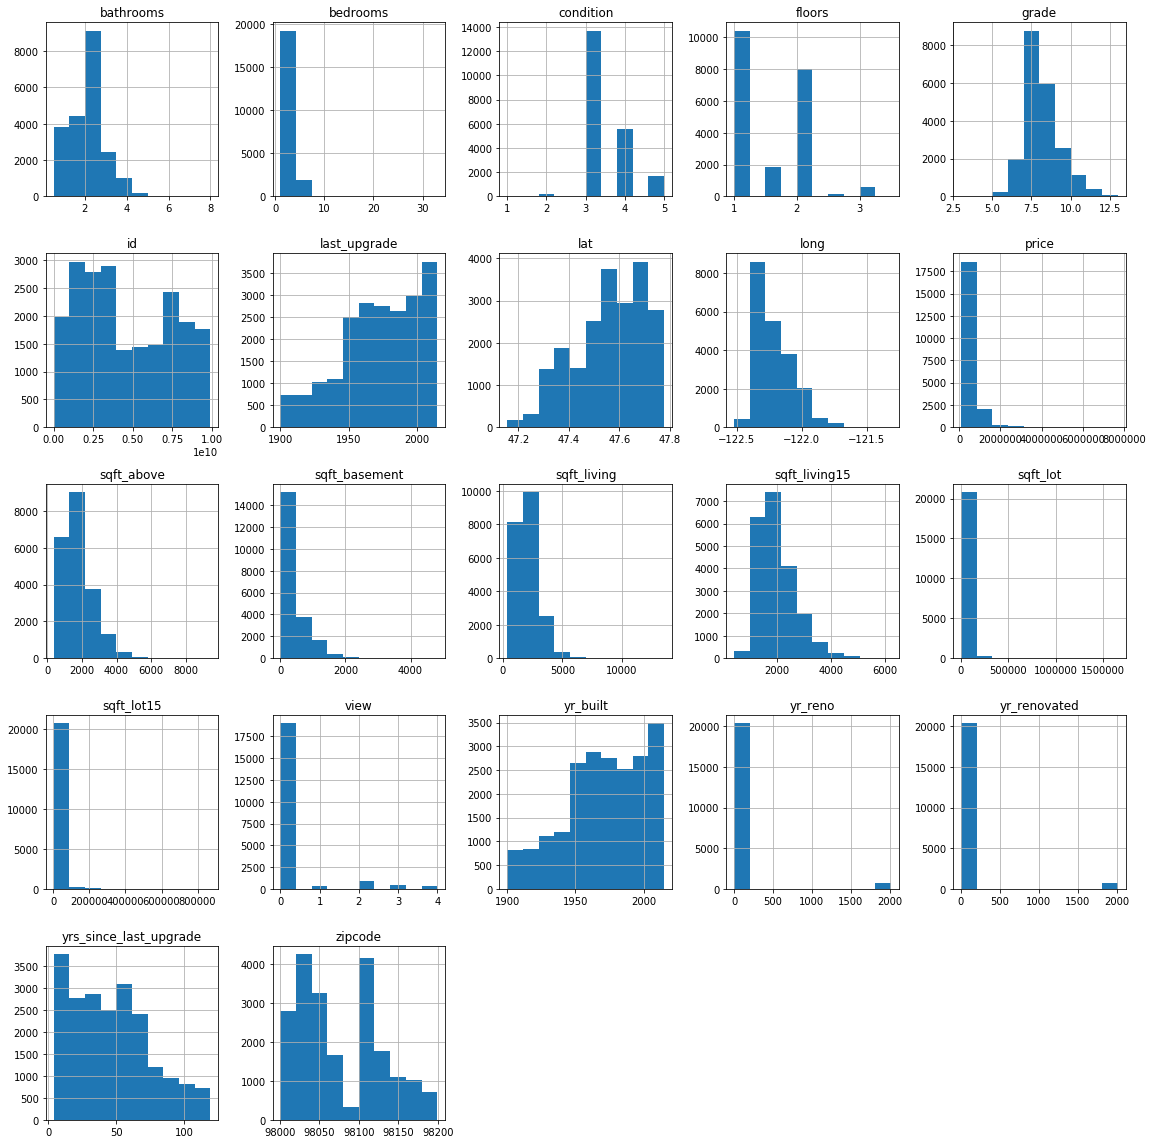

In [38]:
kc.hist(figsize=(16,16));
plt.tight_layout()

### Initial Scatter Matrix

In [39]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (16,16)

In [40]:
#pd.plotting.scatter_matrix(kc);

In looking at data, **decide to drop ID** - this is a unique identifier that is assigned after a home is listed and who's purpose is to track the individual record rather than to quantify attributes of a property.


### Also in viewing the scatter plot several categories demonstrate categorical patterns.


In [41]:
#dropping the waterfront column
kc.drop('id', axis=1, inplace=True)

## Inspecting columns that could be categorical data :
    - floors -assigned category code
    - view - assigned category code
    - condition - assigned category code
    - grade - assigned category code
    - zipcode - assigned a category code after evaluation.
    
    ...and cleaning and looking for initial correlation


In [42]:
kc.head()

date     price  bedrooms  ...  yr_reno  last_upgrade  yrs_since_last_upgrade
0 2014-10-13  221900.0         3  ...        0          1955                      64
1 2014-12-09  538000.0         3  ...     1991          1991                      28
2 2015-02-25  180000.0         2  ...        0          1933                      86
3 2014-12-09  604000.0         4  ...        0          1965                      54
4 2015-02-18  510000.0         3  ...        0          1987                      32

[5 rows x 22 columns]

### Floors 

Categorical Values 1-5; no obvious clear correlation upon initial inspection -

In [43]:
kc['floors'].describe()

count    21082.00000
mean         1.49362
std          0.53937
min          1.00000
25%          1.00000
50%          1.50000
75%          2.00000
max          3.50000
Name: floors, dtype: float64

In [44]:
cat_floors = kc['floors'].astype('category')
coded_floors = cat_floors.cat.codes
kc['floors'] = coded_floors

DataType:
	 int8
Null Values Present = 0


count    21082.000
mean         0.987
std          1.079
min          0.000
25%          0.000
50%          1.000
75%          2.000
max          5.000
Name: floors, dtype: float64


Value Counts:


0    0.494593
2    0.381510
1    0.088132
4    0.028128
3    0.007305
5    0.000332
Name: floors, dtype: float64

(<Figure size 1152x1152 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E0C2050C18>,
       dtype=object))

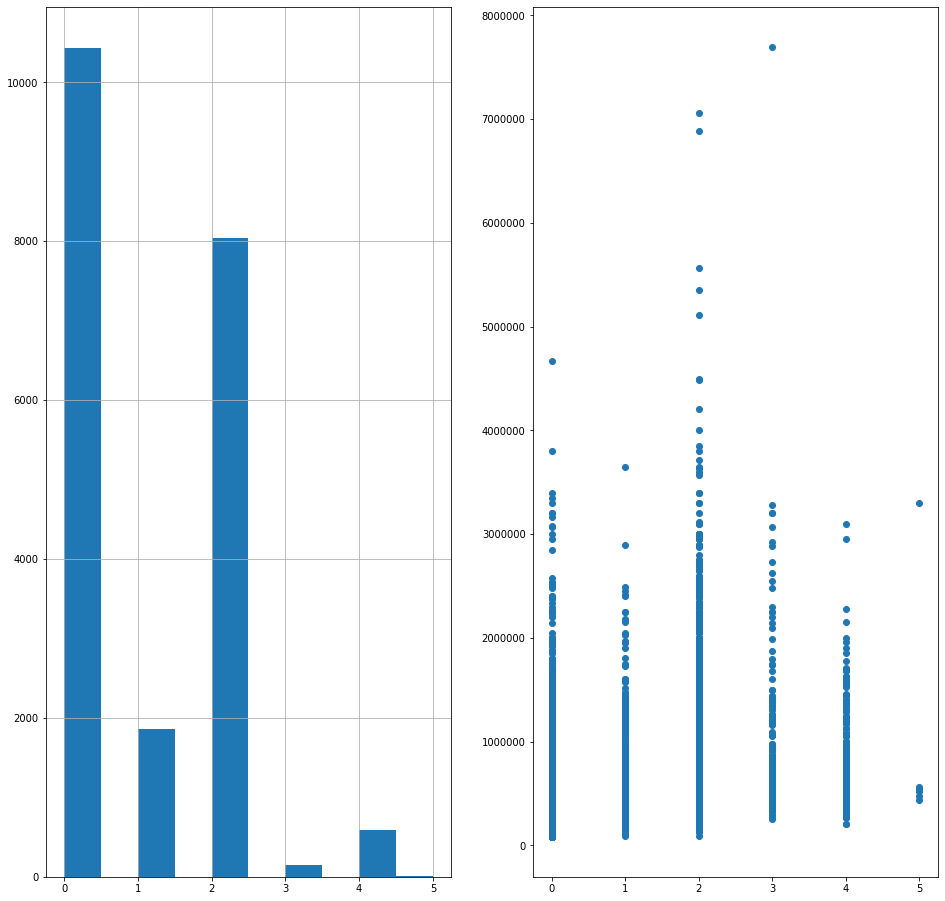

In [45]:
check_column(kc, 'floors')

see no real correlation between price and floors

### View

Categorical Values 1-4: no clear correlation upon inital inspection

In [46]:
kc['view'].describe()

count    21082.000000
mean         0.233327
std          0.765066
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64

In [47]:
kc['view'].value_counts()

0.0    19018
2.0      930
3.0      496
1.0      327
4.0      311
Name: view, dtype: int64

In [48]:
cat_view = kc['view'].astype('category')
coded_view = cat_view.cat.codes
kc['view'] = coded_view

DataType:
	 int8
Null Values Present = 0


count    21082.000
mean         0.233
std          0.765
min          0.000
25%          0.000
50%          0.000
75%          0.000
max          4.000
Name: view, dtype: float64


Value Counts:


0    0.902097
2    0.044113
3    0.023527
1    0.015511
4    0.014752
Name: view, dtype: float64

(<Figure size 1152x1152 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E0C10653C8>,
       dtype=object))

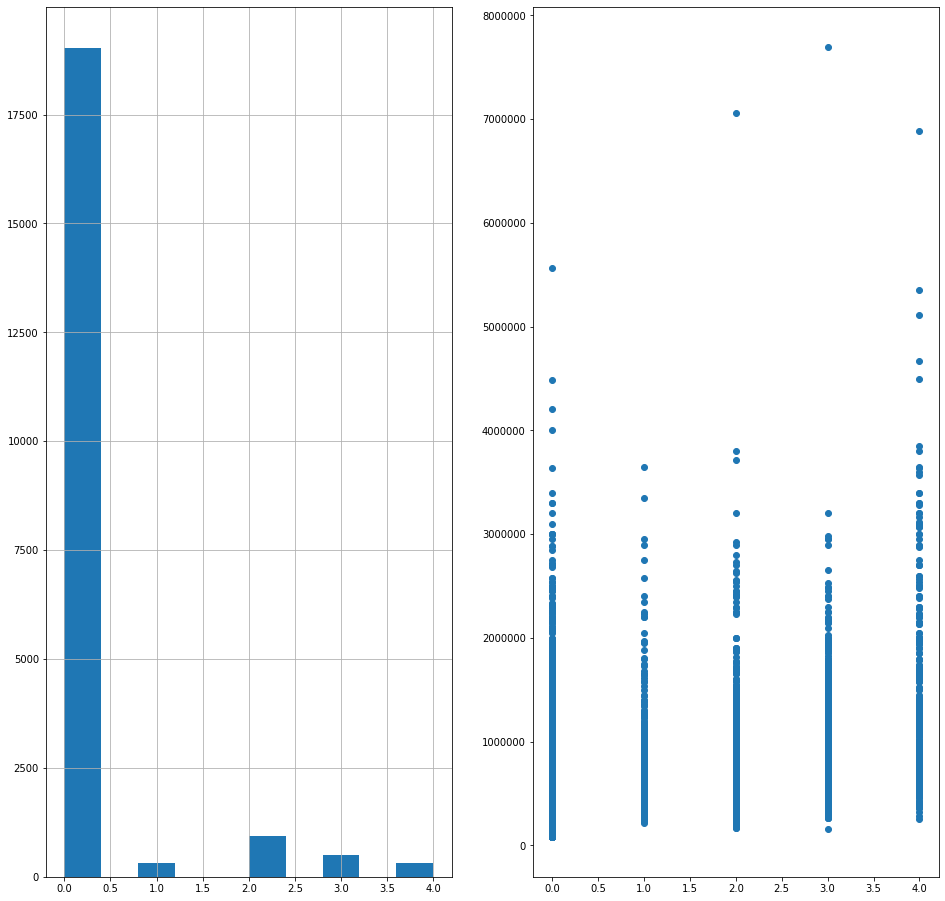

In [49]:
check_column(kc, 'view')

no clear correlation between price and view - would be ok dropping this .. 

### Condition price increases with a value of '2'
 Notes: Categorical values scale 1-5 ; mean is 2.4 std .65 13K of 21K are 2.4's

In [50]:
kc['condition'].describe()

count    21082.000000
mean         3.409828
std          0.650597
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: condition, dtype: float64

In [51]:
kc['condition'].value_counts()

3    13688
4     5538
5     1662
2      166
1       28
Name: condition, dtype: int64

In [52]:
cat_condition = kc['condition'].astype('category')
coded_condition = cat_condition.cat.codes
kc['condition'] = coded_condition

DataType:
	 int8
Null Values Present = 0


count    21082.000
mean         2.410
std          0.651
min          0.000
25%          2.000
50%          2.000
75%          3.000
max          4.000
Name: condition, dtype: float64


Value Counts:


2    0.649274
3    0.262689
4    0.078835
1    0.007874
0    0.001328
Name: condition, dtype: float64

(<Figure size 1152x1152 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E0C0DC6B70>,
       dtype=object))

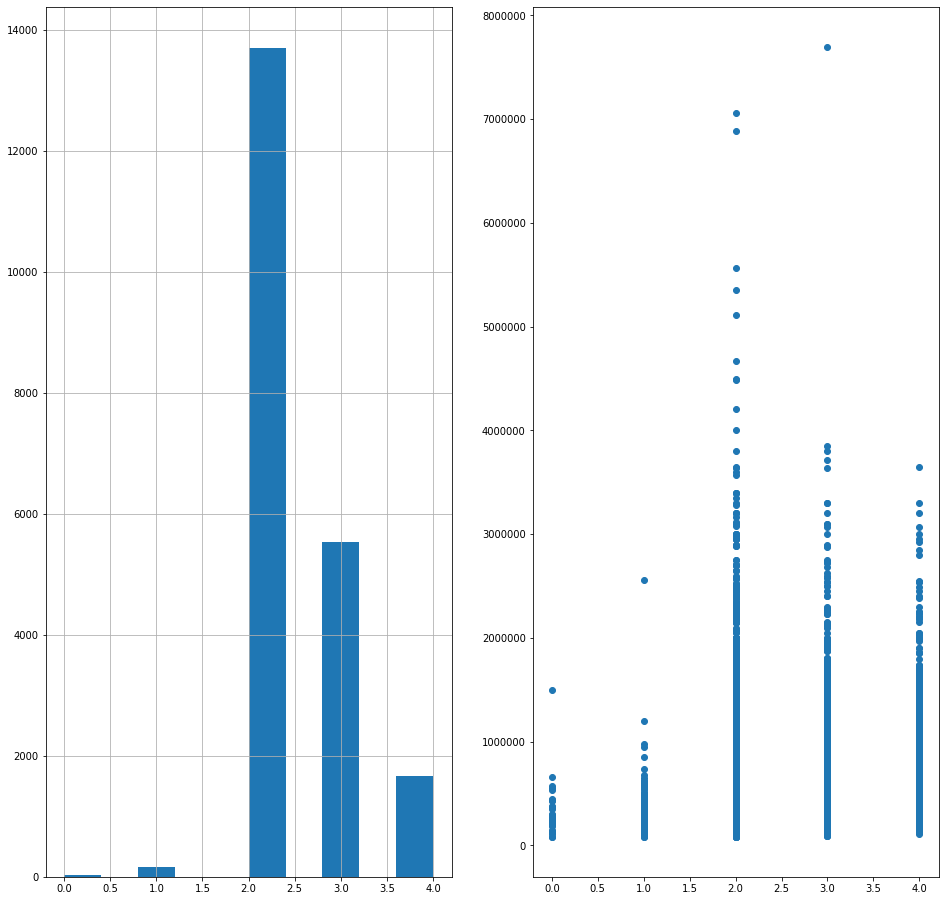

In [53]:
check_column(kc, 'condition')

### Grade

Categorical values - scale 1 - 13

**Initial inspection shows correlation** : Distribution looks normal, initial Mean 7.5. std 1.17 there are some outliers ...

In [54]:
kc['grade'].describe()

count    21082.000000
mean         7.657717
std          1.173690
min          3.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         13.000000
Name: grade, dtype: float64

In [55]:
kc['grade'].value_counts()

7     8762
8     5922
9     2546
6     1991
10    1108
11     389
5      235
12      88
4       27
13      13
3        1
Name: grade, dtype: int64

In [56]:
cat_grade = kc['grade'].astype('category')
coded_grade = cat_grade.cat.codes
kc['grade'] = coded_grade

DataType:
	 int8
Null Values Present = 0


count    21082.000
mean         4.658
std          1.174
min          0.000
25%          4.000
50%          4.000
75%          5.000
max         10.000
Name: grade, dtype: float64


Value Counts:


4     0.415615
5     0.280903
6     0.120767
3     0.094441
7     0.052557
8     0.018452
2     0.011147
9     0.004174
1     0.001281
10    0.000617
0     0.000047
Name: grade, dtype: float64

(<Figure size 1152x1152 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E0C110F400>,
       dtype=object))

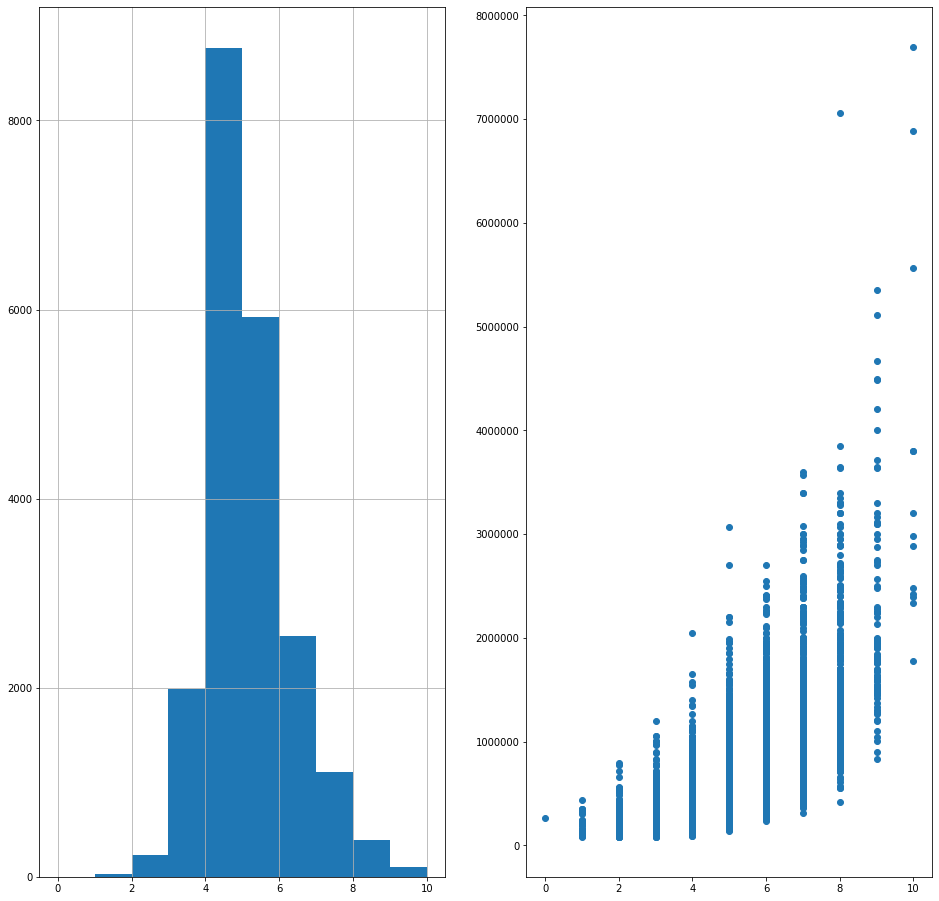

In [57]:
check_column(kc, 'grade')


In [58]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats

from statsmodels.formula.api import ols

In [59]:
kc.head()

date     price  bedrooms  ...  yr_reno  last_upgrade  yrs_since_last_upgrade
0 2014-10-13  221900.0         3  ...        0          1955                      64
1 2014-12-09  538000.0         3  ...     1991          1991                      28
2 2015-02-25  180000.0         2  ...        0          1933                      86
3 2014-12-09  604000.0         4  ...        0          1965                      54
4 2015-02-18  510000.0         3  ...        0          1987                      32

[5 rows x 22 columns]

## Zip Codes What to do???

Interesting... initial hist demonstrates trends, even though zipcodes aren't correlation but not linear  there are zip codes that command a higher price - that is clear...  would need to look group first... 
**how do I do that?** how could I graph this? 'kc.groupby('zipcode')['price'].mean()'

**Mapping longitude and latitude while cross-referencing price demonstrates this, how to show correlation?**

In [60]:
kc['zipcode'].value_counts()

98103    587
98038    571
98115    565
98052    561
98117    541
        ... 
98102    100
98010     98
98024     78
98148     55
98039     49
Name: zipcode, Length: 70, dtype: int64

In [61]:
#there are 70 zip codes, are these categorical values? looking at histogram for more information
#on how to categorize zip codes
kc['zipcode'].describe()

count    21082.000000
mean     98077.858837
std         53.528769
min      98001.000000
25%      98033.000000
50%      98065.000000
75%      98117.000000
max      98199.000000
Name: zipcode, dtype: float64

In [62]:
## importing tools to further visually inspect zip codes:
import plotly.graph_objects as go

In [63]:
import plotly.express as px


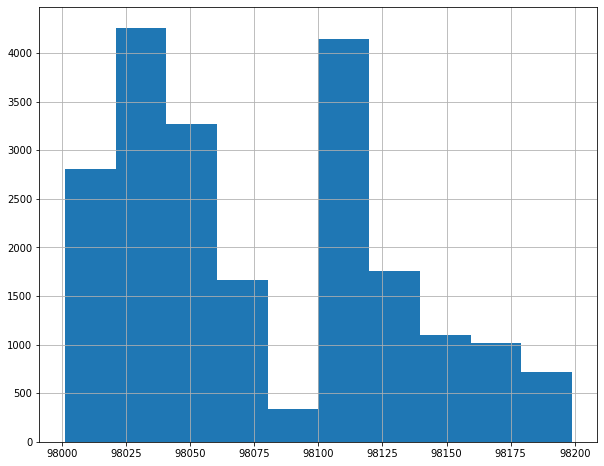

In [64]:
kc['zipcode'].hist(figsize=(10,8))

In [65]:
##upon inspection, one idea is that zip codes appear to have some sort of 
#continuous values that could be binned into 10 ?

In [66]:
#int_zipcode = kc['zipcode'].astype('str').astype('int')

In [67]:
#bins = [98000, 98020, 98040, 98060, 98080, 98100, 98120, 98140, 98160, 98177, 98200]

In [68]:
#bins_zip = pd.cut(kc['zipcode'].astype('str').astype('float'), bins)
#bins_zip = bins_zip.cat.as_ordered()
#bins_zip.head()

In [69]:
#bins_zip.value_counts().plot(kind='bar', figsize=(11,8))

In [70]:
#kc['zip_bins'] = bins_zip

In [71]:
#cat_zip_bins1 = kc['zip_bins'].astype('category')
#coded_zip_bins1 = cat_zip_bins1.cat.codes
#kc['zip_bins'] = coded_zip_bins1

Creating a categorical codes for zip to compare to evaluate the difference with 70 different categories.

In [72]:
display(kc.head())

date     price  bedrooms  ...  yr_reno  last_upgrade  yrs_since_last_upgrade
0 2014-10-13  221900.0         3  ...        0          1955                      64
1 2014-12-09  538000.0         3  ...     1991          1991                      28
2 2015-02-25  180000.0         2  ...        0          1933                      86
3 2014-12-09  604000.0         4  ...        0          1965                      54
4 2015-02-18  510000.0         3  ...        0          1987                      32

[5 rows x 22 columns]

In [73]:
cat_zip = kc['zipcode'].astype('category')
coded_zip = cat_zip.cat.codes
kc['zip_cats'] = coded_zip

DataType:
	 int8
Null Values Present = 0


count    21082.000
mean        35.114
std         19.257
min          0.000
25%         21.000
50%         34.000
75%         51.000
max         69.000
Name: zip_cats, dtype: float64


Value Counts:


42    0.027844
23    0.027085
49    0.026800
28    0.026610
51    0.025662
        ...   
41    0.004743
8     0.004649
14    0.003700
61    0.002609
24    0.002324
Name: zip_cats, Length: 70, dtype: float64

(<Figure size 1152x1152 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E0C09FD6A0>,
       dtype=object))

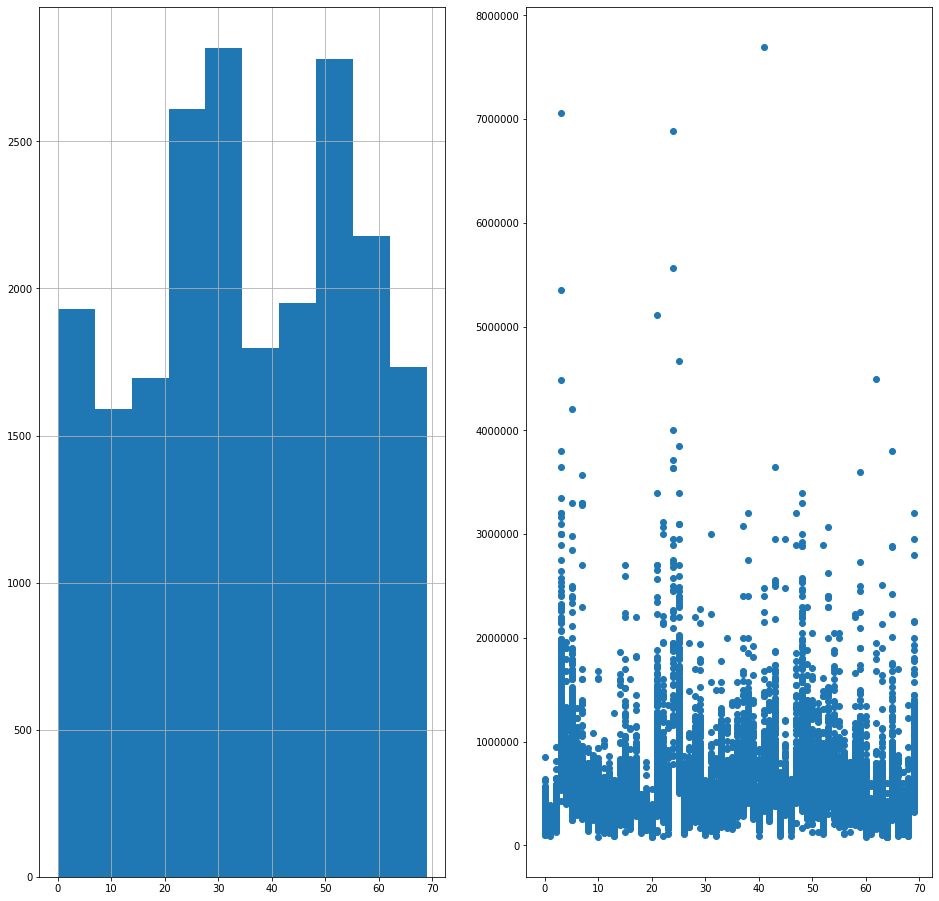

In [74]:
check_column(kc, 'zip_cats')

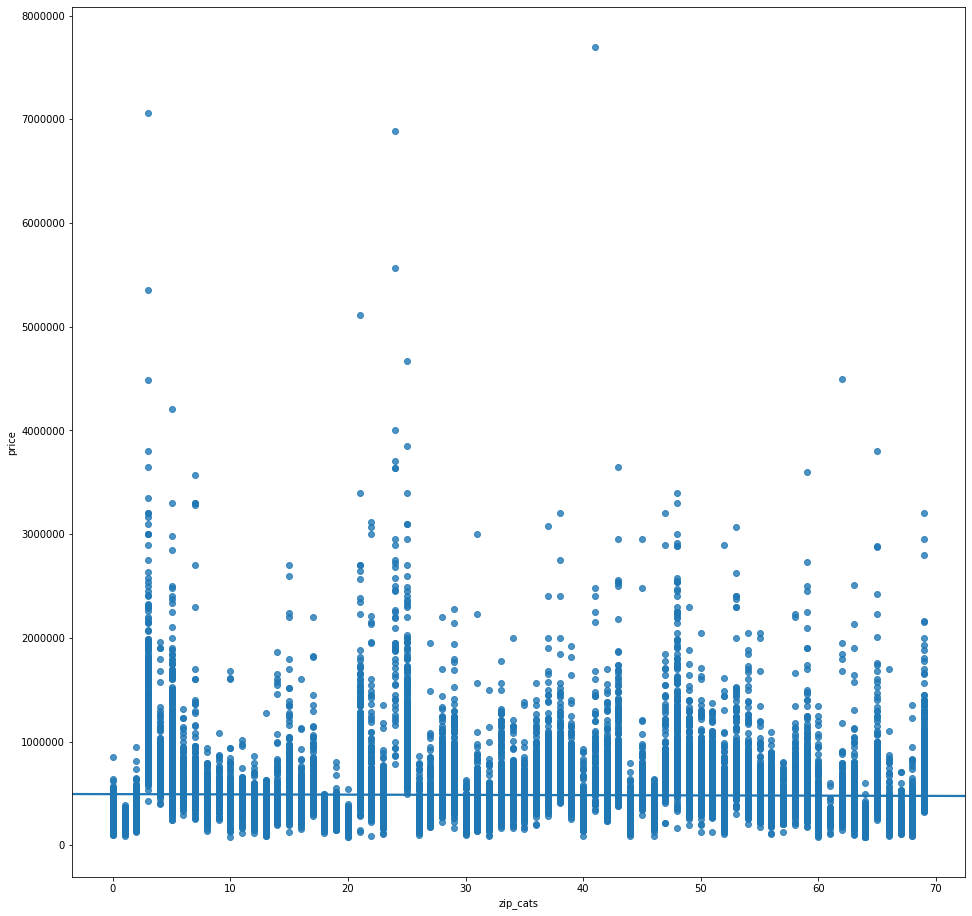

In [75]:
sns.regplot(kc['zip_cats'], kc['price'], robust=True)

In [76]:
zip_price = kc.groupby('zipcode')['price'].mean().sort_values(ascending=False)

## Need help trying to plot this:

In [77]:
# Top 10 zip codes in King County:
top_10_zips  = zip_price.head(10)
top_10_zips.head()

zipcode
98039    2.135612e+06
98004    1.359437e+06
98040    1.186082e+06
98112    1.098993e+06
98102    9.037020e+05
Name: price, dtype: float64

In [78]:
#sns.barplot(x='zipcode', y='price', data=top_10_zips)

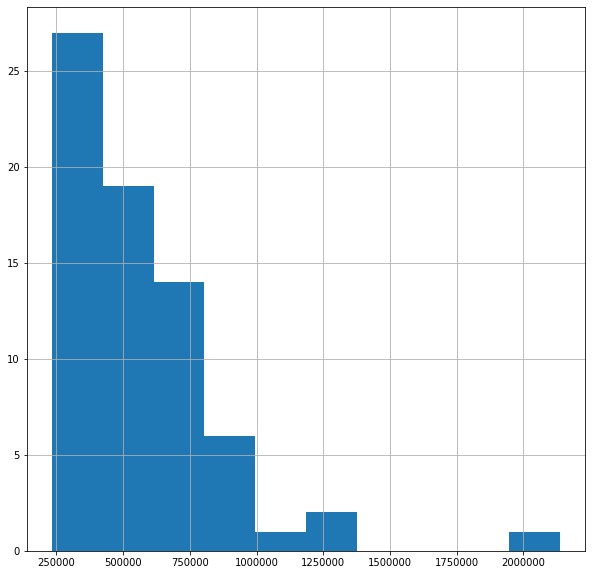

In [79]:
zip_price.hist(figsize=(10,10));

In [80]:
px.histogram(kc, x='zipcode', y='price', histfunc='avg')

In [81]:
##what's the best way to plot this?

## or I could handle it with lat/long ? How do I get the legned to show?

No handles with labels found to put in legend.


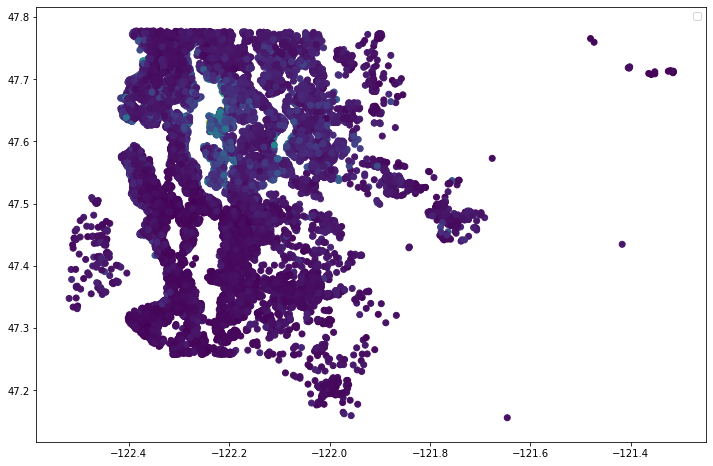

In [82]:
fig = plt.figure(figsize=(12,8))
plt.scatter(x=kc['long'], y=kc['lat'], c=kc['price'])
plt.legend()

plt.show()
###how do I get the legend to show

## Another Look and Futher Cleaning of Numeric Data

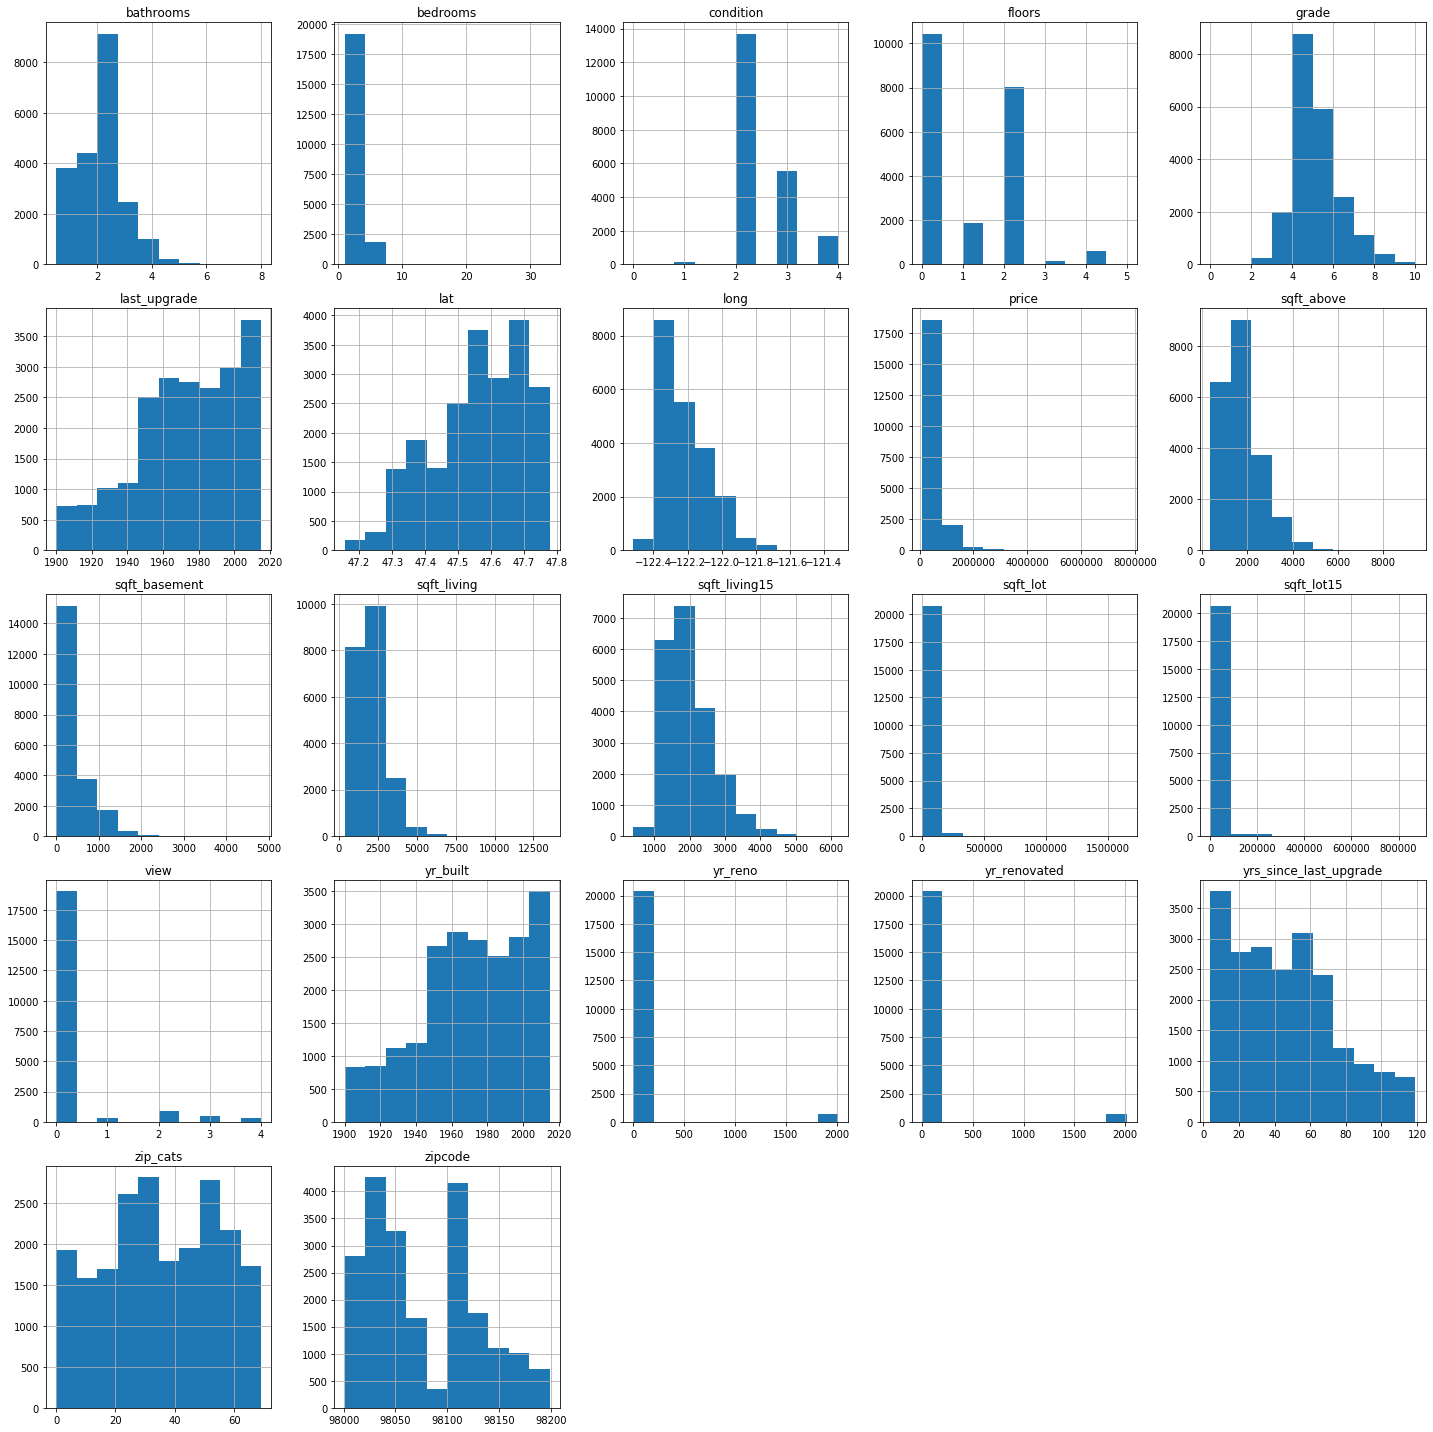

In [83]:
kc.hist(figsize=(20,20));
plt.tight_layout()

### Sqft Living

skewed distribution, correlation, removed outliers **kc2** is new df

DataType:
	 int64
Null Values Present = 0


count    21082.000
mean      2080.360
std        917.856
min        370.000
25%       1430.000
50%       1910.000
75%       2550.000
max      13540.000
Name: sqft_living, dtype: float64


Value Counts:


1300    0.006404
1400    0.006309
1440    0.006166
1010    0.006024
1660    0.006024
          ...   
4970    0.000047
2905    0.000047
2793    0.000047
4810    0.000047
1975    0.000047
Name: sqft_living, Length: 1024, dtype: float64

(<Figure size 1152x1152 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E0DCC16630>,
       dtype=object))

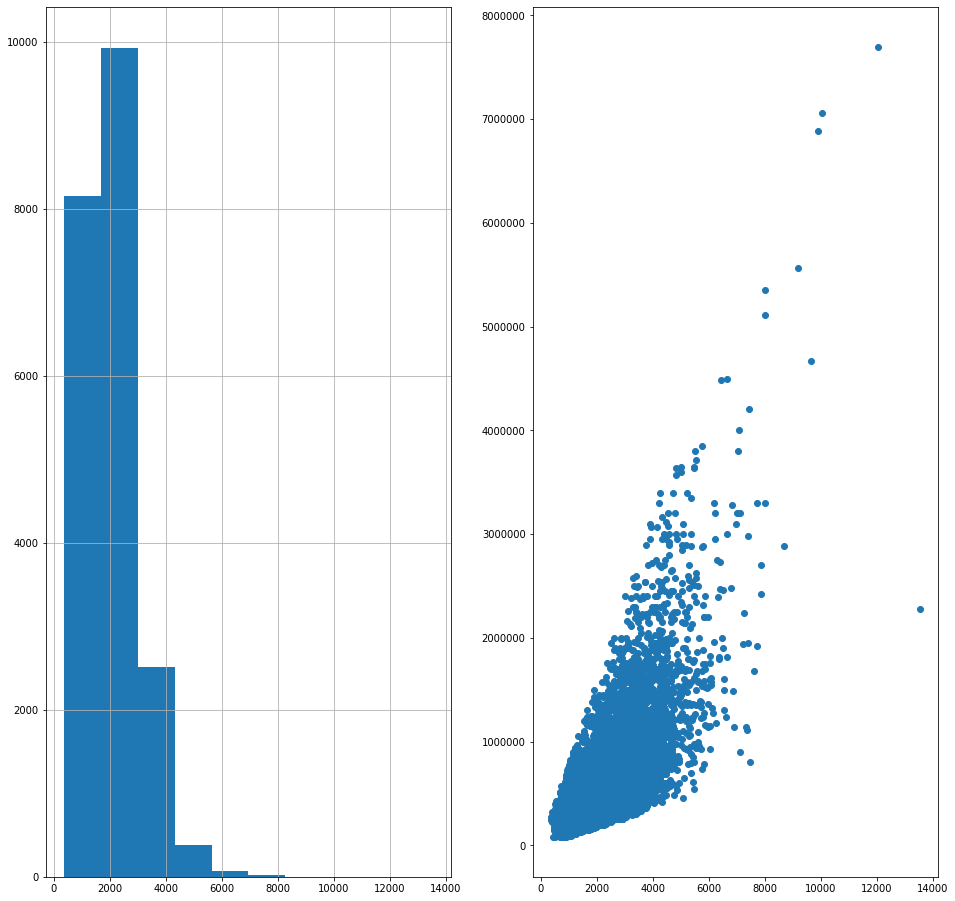

In [84]:
check_column(kc, 'sqft_living')

In [85]:
kc.head(6)

date      price  ...  yrs_since_last_upgrade  zip_cats
0 2014-10-13   221900.0  ...                      64        66
1 2014-12-09   538000.0  ...                      28        55
2 2015-02-25   180000.0  ...                      86        16
3 2014-12-09   604000.0  ...                      54        58
4 2015-02-18   510000.0  ...                      32        37
5 2014-05-12  1230000.0  ...                      18        29

[6 rows x 23 columns]

#### Removing outliers based on zscores: all those with a zscore higher than 3 standard deviations from the mean will be eliminated and creating a filtered dataset to work from - kc2

In [86]:

import scipy.stats as stats
z_score = np.abs(stats.zscore(kc['sqft_living']))


In [87]:
kc['sqft_living_zscore'] = z_score

In [88]:
kc2 = kc.loc[kc['sqft_living_zscore'] < 3]

#### Examining data after outlier removal and updating function for future checks: 

In [89]:
def check_column(df, col_name, n_unique=10):
    """Displays info on null values, datatype, unqiue values
    and displays .describe()
    
    Args:
        df (df): contains the columns
        col_name (str): name of the df column to show
        n_unique (int): Number of unique values top show.
    
    Return:
        fig, ax (Matplotlib Figure and Axes)
    """
    
    print('DataType:')
    print('\t',df[col_name].dtypes)
    
    num_nulls = df[col_name].isna().sum()
    print(f'Null Values Present = {num_nulls}')
    
    display(df[col_name].describe().round(3))
    
    print('\nValue Counts:')
    display(df[col_name].value_counts(n_unique)) 
    
 
    
    ## Add some EDA figures
    fig, ax = plt.subplots(ncols=2);
    
    df[col_name].hist(ax=ax[0])
    ax[1].scatter(df[col_name], kc2['price'])
    
    return fig,ax

#check_column(df,'condition')

DataType:
	 int64
Null Values Present = 0


count    20838.000
mean      2036.666
std        820.171
min        370.000
25%       1420.000
50%       1900.000
75%       2520.000
max       4830.000
Name: sqft_living, dtype: float64


Value Counts:


1300    0.006479
1400    0.006383
1440    0.006239
1660    0.006095
1010    0.006095
          ...   
4810    0.000048
2793    0.000048
2905    0.000048
3001    0.000048
2007    0.000048
Name: sqft_living, Length: 867, dtype: float64

(<Figure size 1152x1152 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E0DCA72C88>,
       dtype=object))

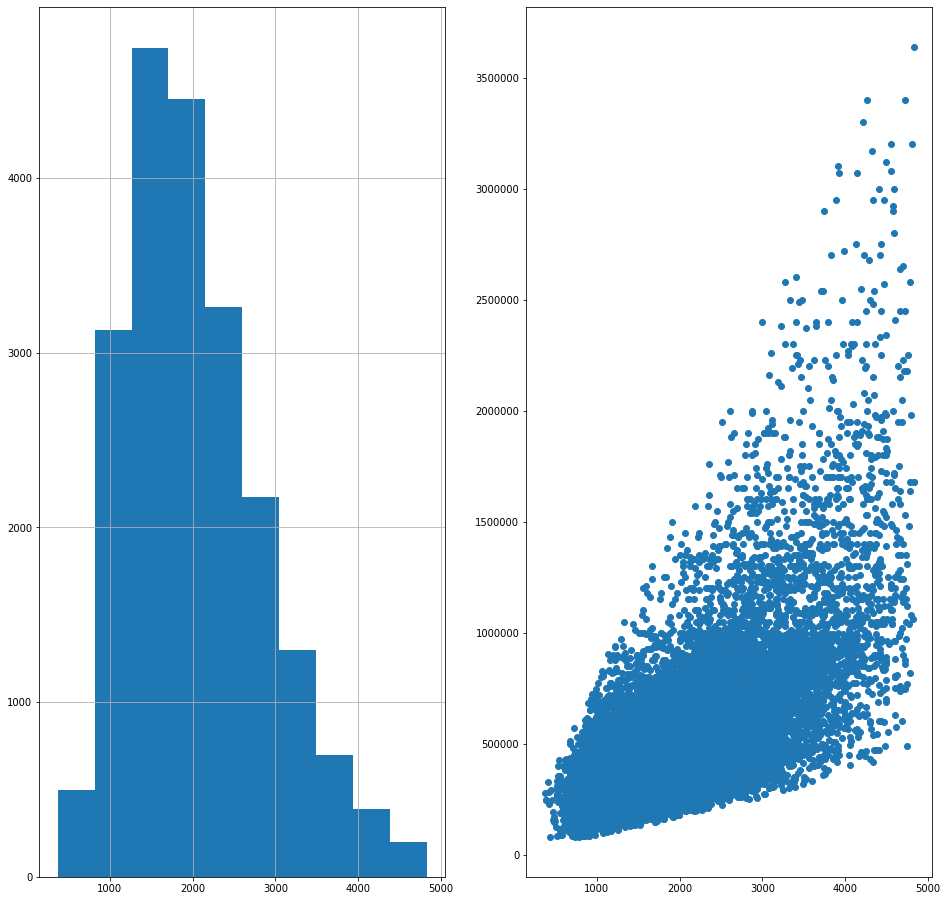

In [90]:
check_column(kc2, 'sqft_living')

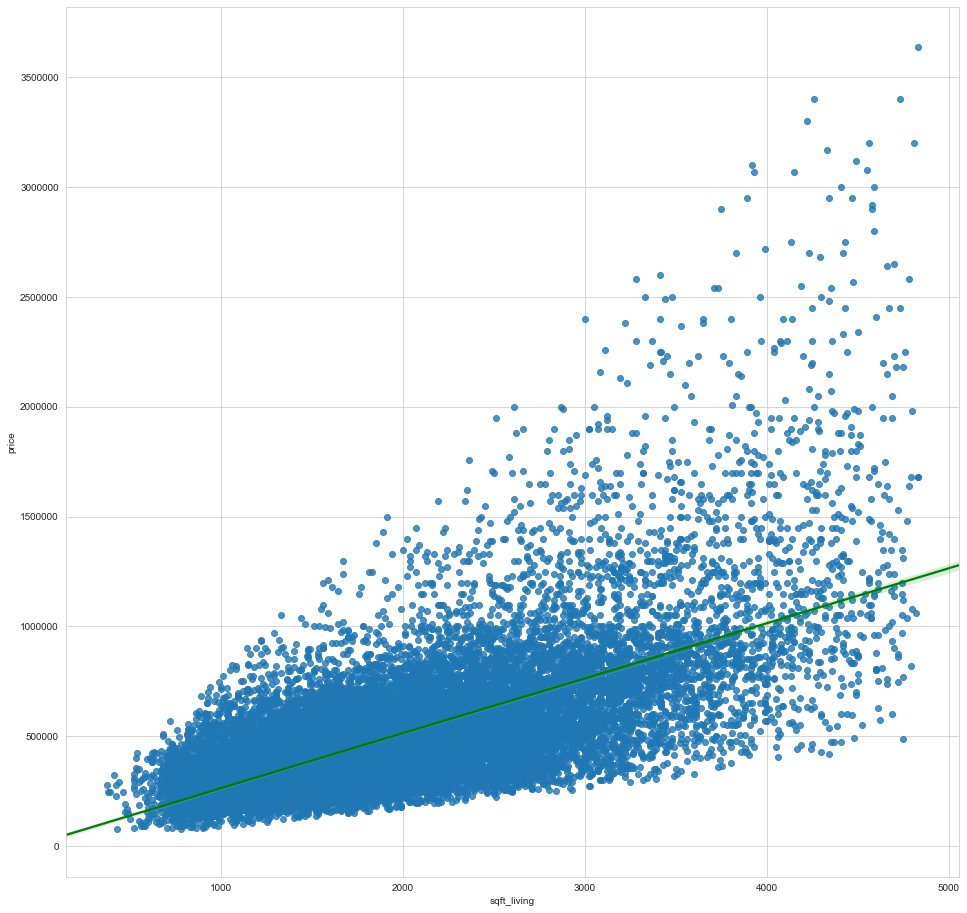

In [91]:
sns.set_style('whitegrid')
sns.regplot(kc2['sqft_living'], kc2['price'],line_kws={"color": "green"})
figure = figsize=(8,8)

#### Observation: Based on this data - a 4000 sqft home would fetch $1M

### Sqft_above

Initial inspection skewed distribution, correlated with price

DataType:
	 int64
Null Values Present = 0


count    20838.000
mean      1755.508
std        762.743
min        370.000
25%       1190.000
50%       1550.000
75%       2180.000
max       4830.000
Name: sqft_above, dtype: float64


Value Counts:


1300    0.009982
1010    0.009886
1200    0.009454
1220    0.009118
1140    0.008686
          ...   
2793    0.000048
2905    0.000048
3001    0.000048
3065    0.000048
2007    0.000048
Name: sqft_above, Length: 843, dtype: float64

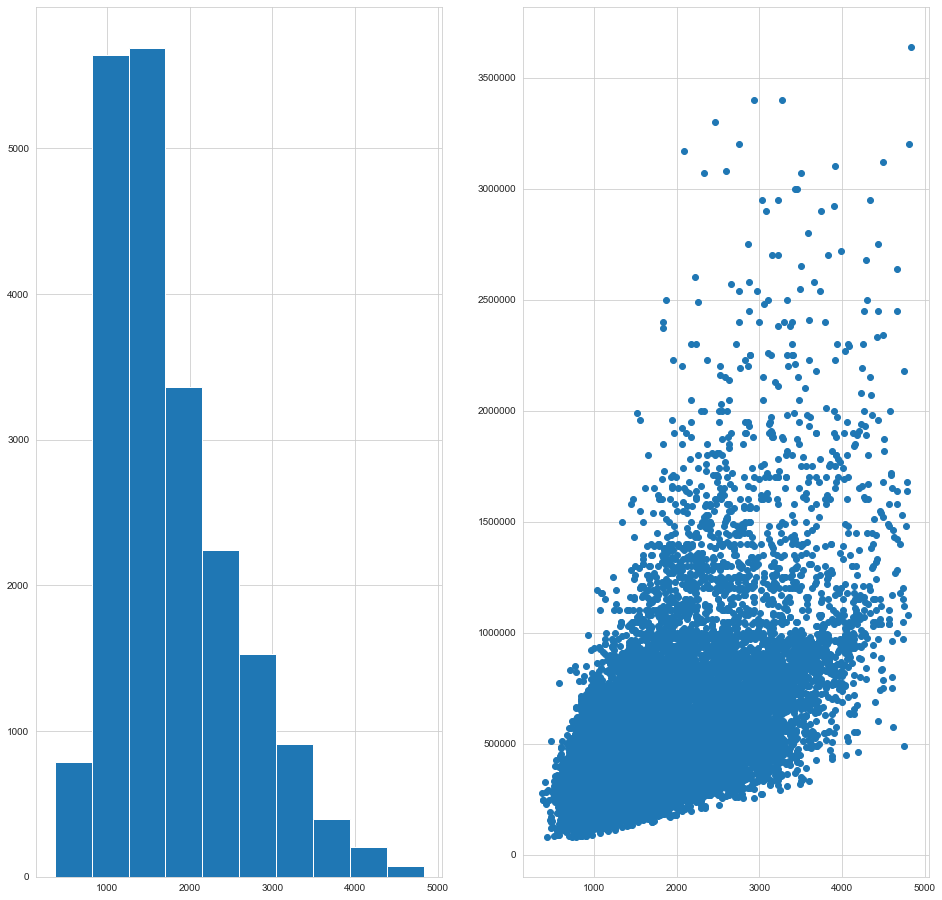

In [92]:

#looking at 
check_column(kc2,'sqft_above');



#### Observation: this data/regline is congruent with sqft_living... this could be duplicative data

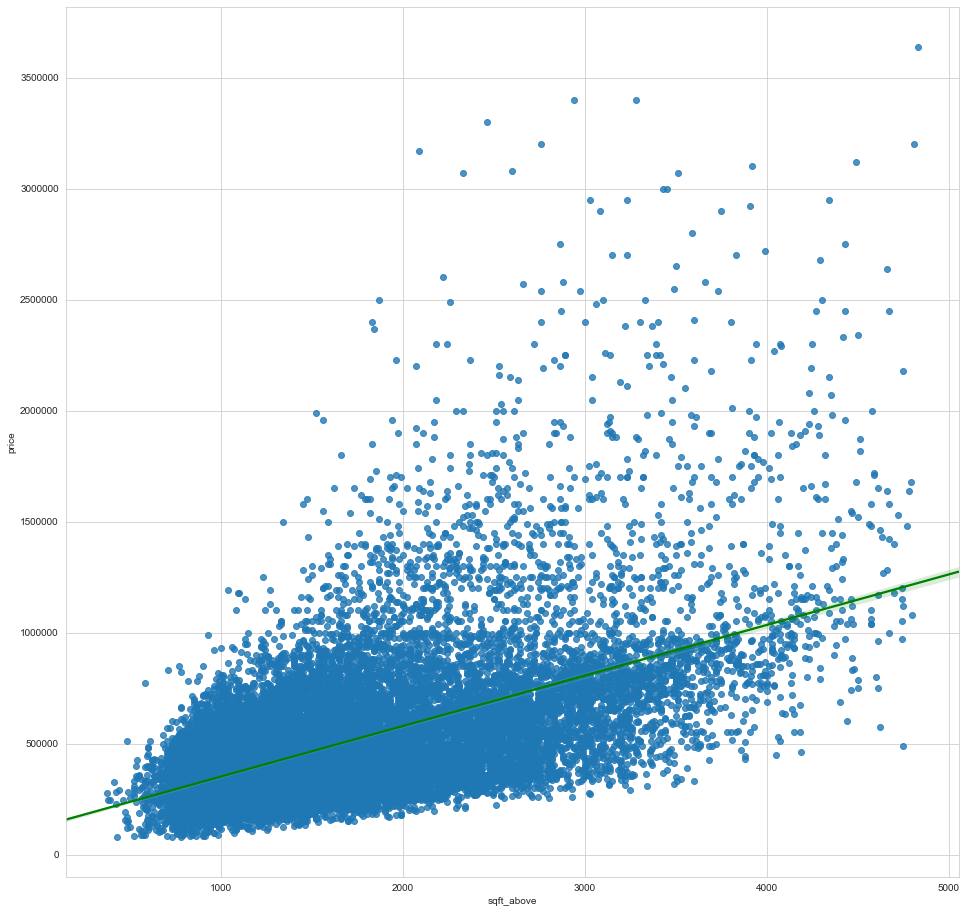

In [93]:
sns.regplot(kc2['sqft_above'], kc2['price'],line_kws={"color": "green"})

### Another look: 

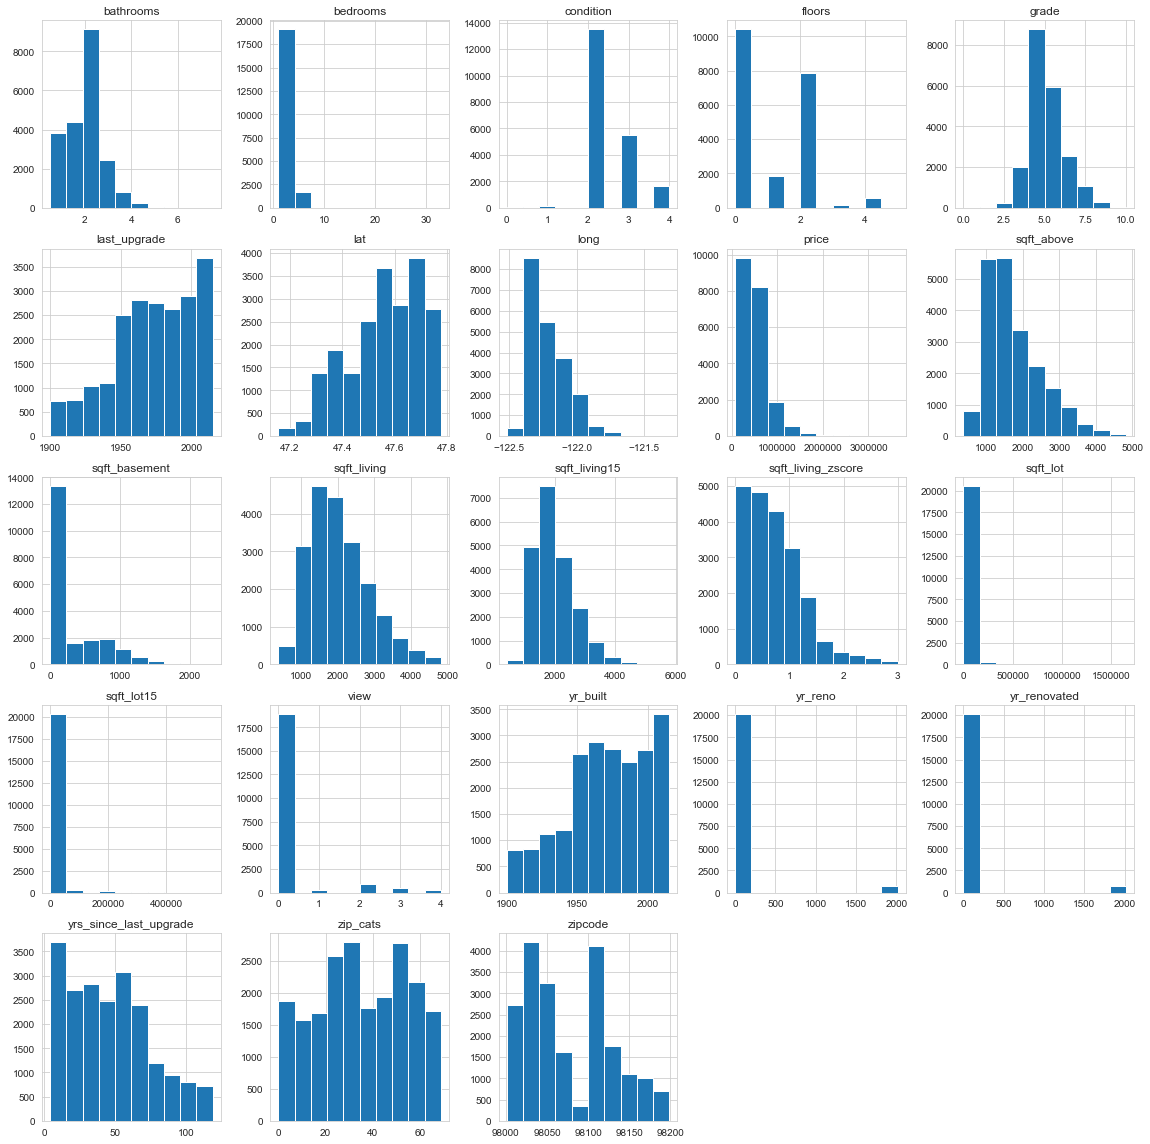

In [94]:
kc2.hist(figsize=(16,16));
plt.tight_layout()

In [95]:
kc2.head()

date     price  ...  zip_cats  sqft_living_zscore
0 2014-10-13  221900.0  ...        66            0.980961
1 2014-12-09  538000.0  ...        55            0.533473
2 2015-02-25  180000.0  ...        16            1.427665
3 2014-12-09  604000.0  ...        58            0.131135
4 2015-02-18  510000.0  ...        37            0.436201

[5 rows x 24 columns]

### sqft_living15

skewed, strong correlation with price - mean- 1966, min 399, max 5790

DataType:
	 int64
Null Values Present = 0


count    20838.000
mean      1966.855
std        656.511
min        399.000
25%       1480.000
50%       1830.000
75%       2340.000
max       5790.000
Name: sqft_living15, dtype: float64


Value Counts:


1440    0.009310
1540    0.009214
1560    0.008974
1500    0.008254
1460    0.007918
          ...   
2873    0.000048
952     0.000048
3193    0.000048
1304    0.000048
2049    0.000048
Name: sqft_living15, Length: 744, dtype: float64

(<Figure size 1152x1152 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E0DF9AD5C0>,
       dtype=object))

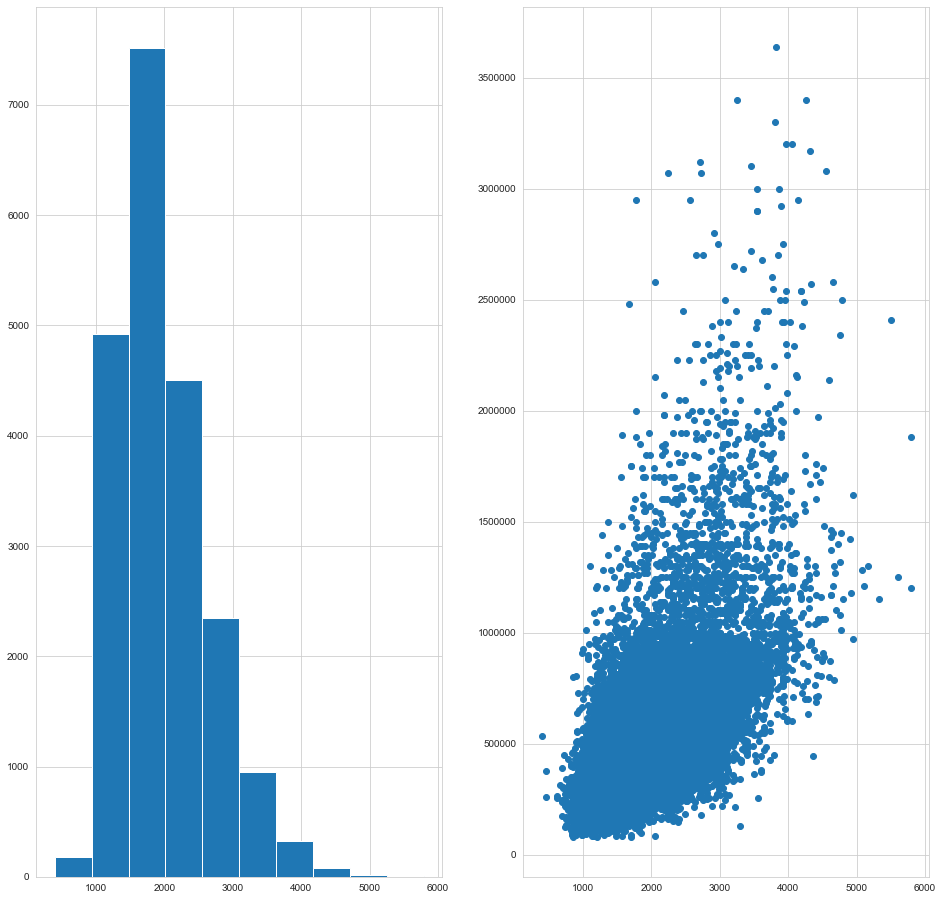

In [96]:
check_column(kc2, 'sqft_living15')

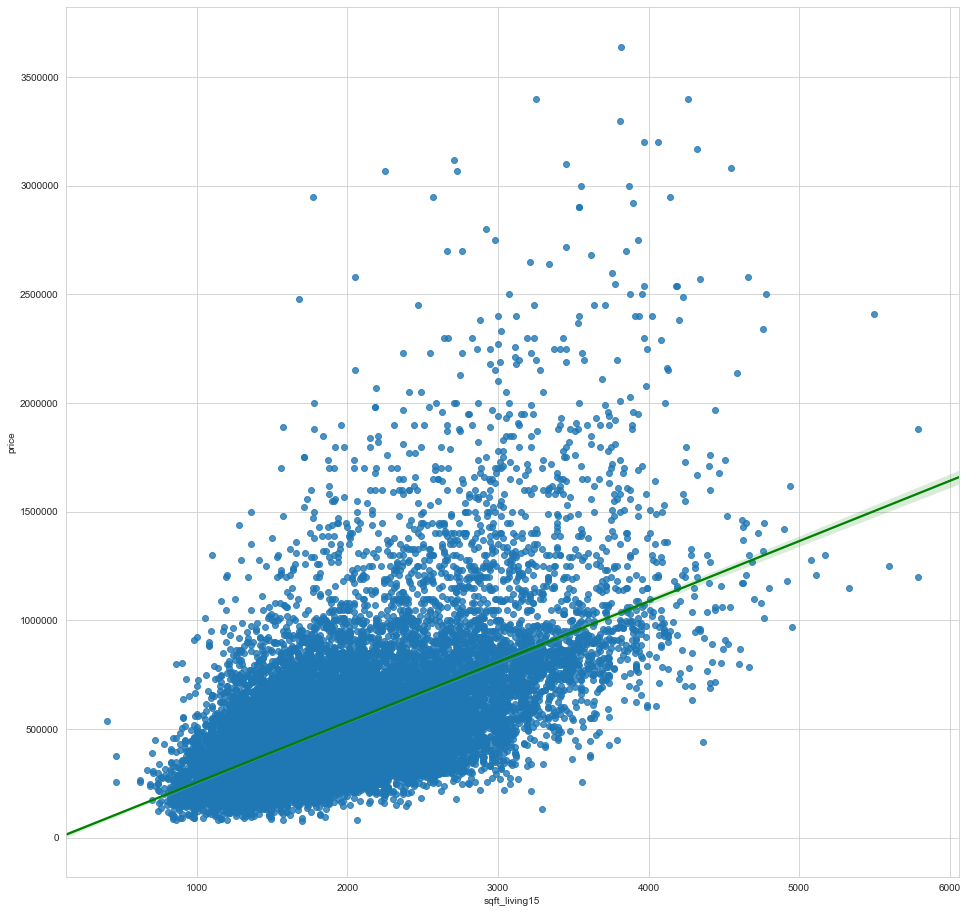

In [97]:
sns.regplot(kc2['sqft_living15'], kc2['price'],line_kws={"color": "green"})

### Bedrooms

Initial look revealed multiple oultiers which were removed outside of 3 standard deviations.  

The filtered data is skewed, and shows a correlation up to 4 bedrooms, after that there is no correlation 

DataType:
	 int64
Null Values Present = 0


count    20838.000
mean         3.358
std          0.915
min          1.000
25%          3.000
50%          3.000
75%          4.000
max         33.000
Name: bedrooms, dtype: float64


Value Counts:


3     0.460409
4     0.317497
2     0.128803
5     0.070496
6     0.011181
1     0.009166
7     0.001344
8     0.000576
9     0.000288
10    0.000144
11    0.000048
33    0.000048
Name: bedrooms, dtype: float64

(<Figure size 1152x1152 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E0DD4AD390>,
       dtype=object))

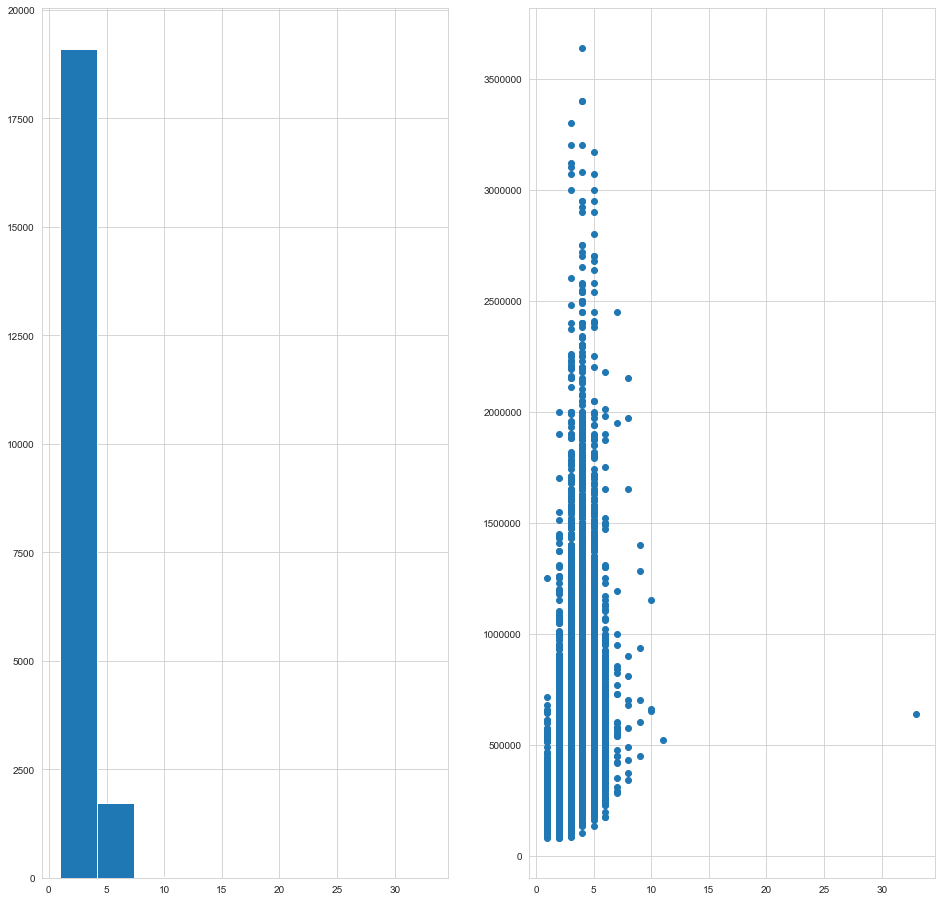

In [98]:
check_column(kc2, 'bedrooms')

In [99]:
z_score1 = np.abs(stats.zscore(kc2['bedrooms']))

In [100]:
kc2['bedrooms_z_score'] = z_score1

C:\Users\aosika\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [101]:
kc2 = kc2.loc[kc2['bedrooms_z_score'] < 3]

#### Observation: much better!

DataType:
	 int64
Null Values Present = 0


count    20787.000
mean         3.346
std          0.865
min          1.000
25%          3.000
50%          3.000
75%          4.000
max          6.000
Name: bedrooms, dtype: float64


Value Counts:


3    0.461538
4    0.318276
2    0.129119
5    0.070669
6    0.011209
1    0.009188
Name: bedrooms, dtype: float64

(<Figure size 1152x1152 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E0DDFB7E48>,
       dtype=object))

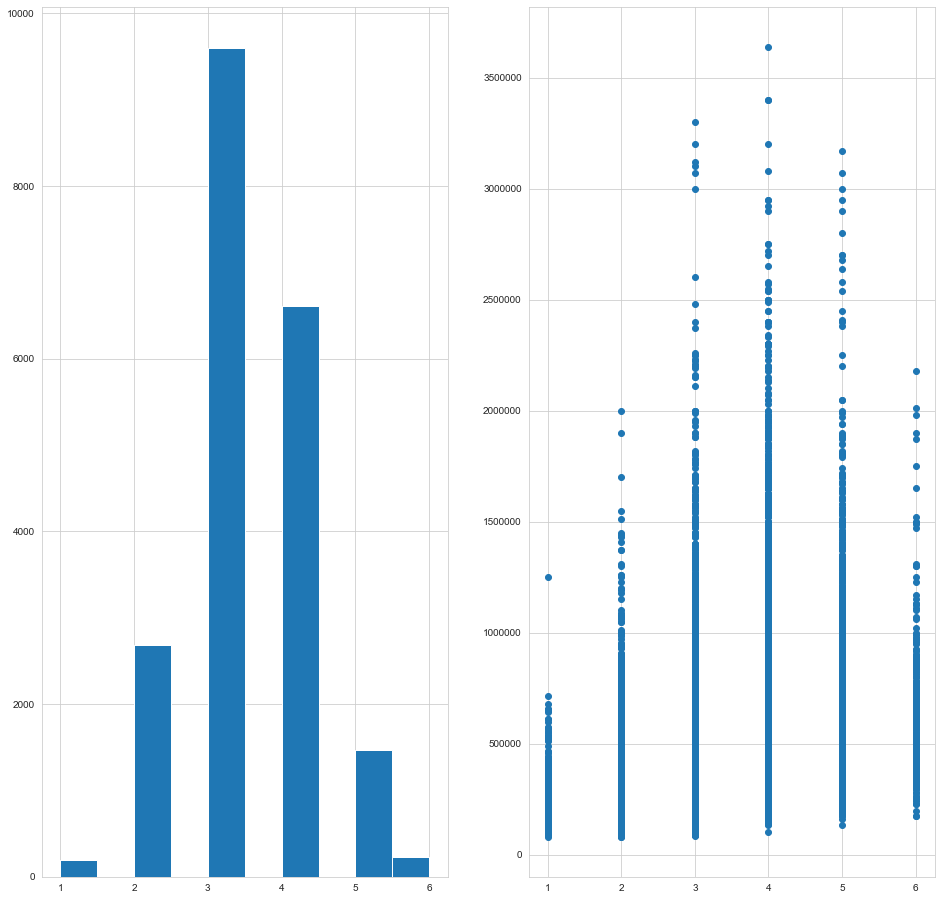

In [102]:
check_column(kc2, 'bedrooms')

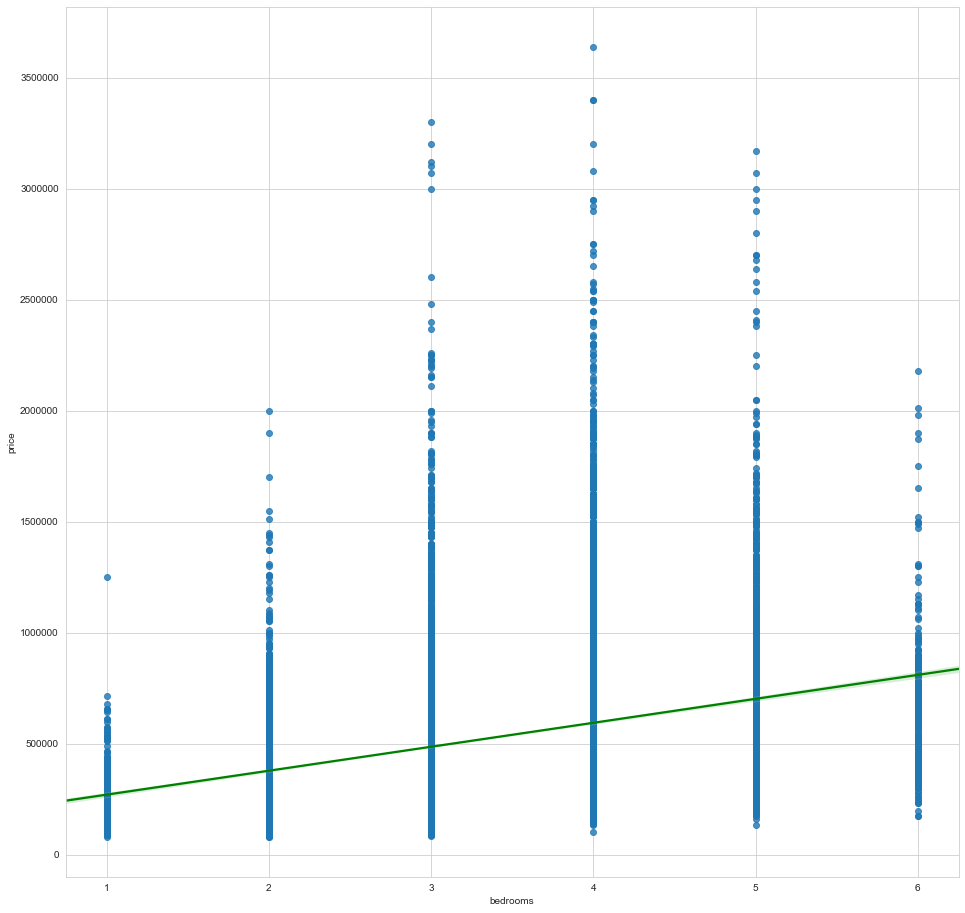

In [103]:
sns.regplot(kc2['bedrooms'], kc2['price'],line_kws={"color": "green"})

### Year built or last upgrade  - see renovation

no correlation 

DataType:
	 int64
Null Values Present = 0


count    20787.000
mean      1972.758
std         28.883
min       1900.000
25%       1954.000
50%       1977.000
75%       1998.000
max       2015.000
Name: last_upgrade, dtype: float64


Value Counts:


2014    0.029057
2005    0.021696
2006    0.021552
2003    0.020975
2004    0.020494
          ...   
1901    0.001251
1902    0.001251
1933    0.001155
1935    0.000914
1934    0.000722
Name: last_upgrade, Length: 116, dtype: float64

(<Figure size 1152x1152 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E0DDE0E278>,
       dtype=object))

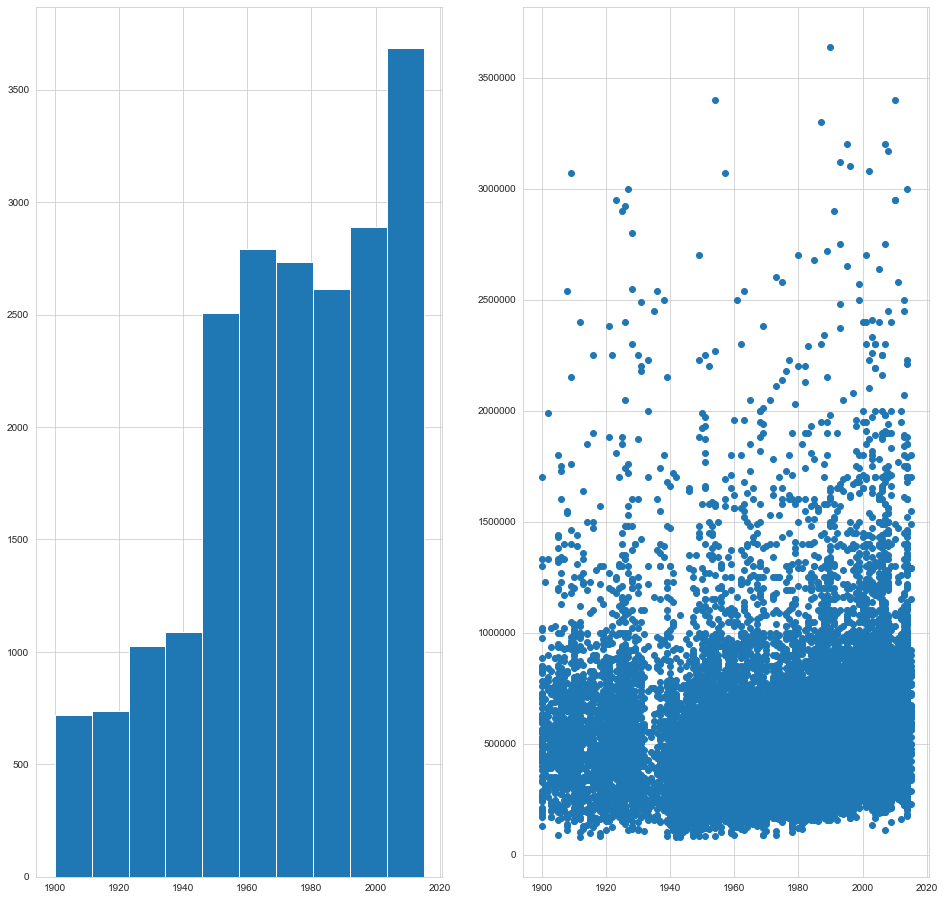

In [104]:
check_column(kc2, 'last_upgrade')

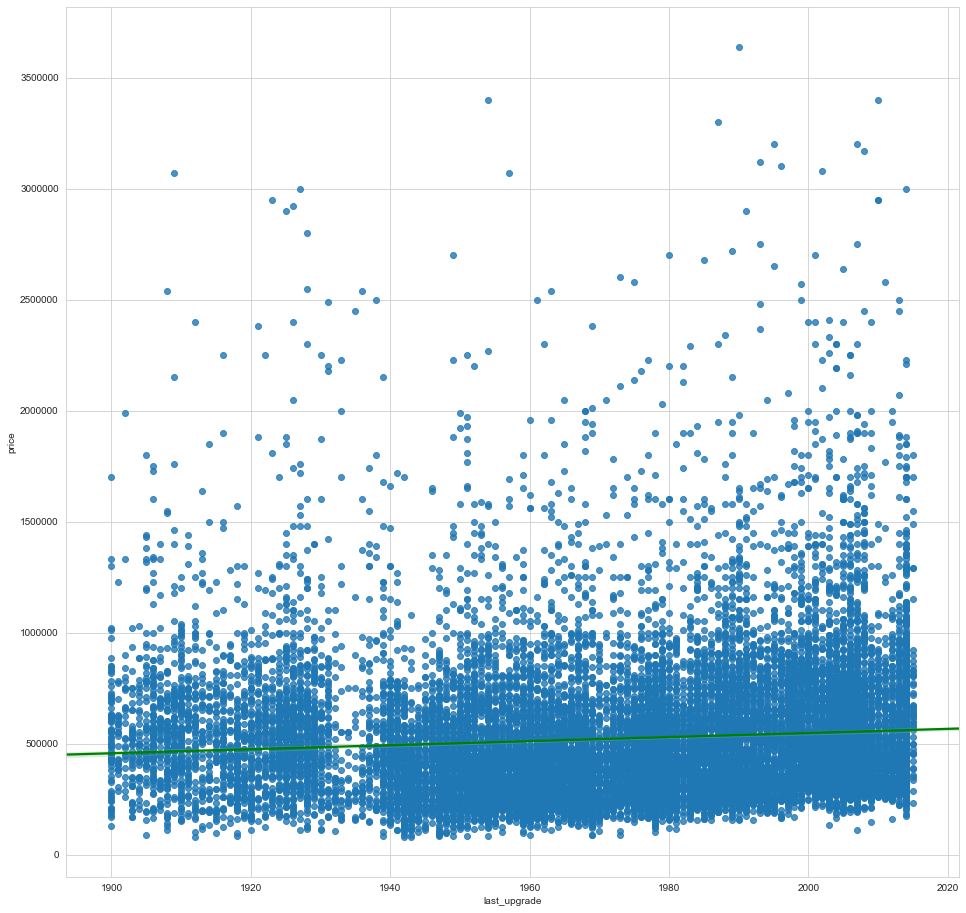

In [105]:
sns.regplot(kc2['last_upgrade'], kc2['price'],line_kws={"color": "green"})

In [106]:
kc2.head()

date     price  ...  sqft_living_zscore  bedrooms_z_score
0 2014-10-13  221900.0  ...            0.980961          0.390947
1 2014-12-09  538000.0  ...            0.533473          0.390947
2 2015-02-25  180000.0  ...            1.427665          1.483858
3 2014-12-09  604000.0  ...            0.131135          0.701964
4 2015-02-18  510000.0  ...            0.436201          0.390947

[5 rows x 25 columns]

### Bathrooms

Values based on bathroom size - some are half baths and full baths depending on their amenities
Mean 2 , Max 5 Correlation, but after 3.25 not really

In [107]:
kc2['bathrooms'].describe()

count    20787.000000
mean         2.088998
std          0.728792
min          0.500000
25%          1.500000
50%          2.250000
75%          2.500000
max          5.250000
Name: bathrooms, dtype: float64

DataType:
	 float64
Null Values Present = 0


count    20787.000
mean         2.089
std          0.729
min          0.500
25%          1.500
50%          2.250
75%          2.500
max          5.250
Name: bathrooms, dtype: float64


Value Counts:


2.50    0.251696
1.00    0.180257
1.75    0.143166
2.25    0.096262
2.00    0.090441
1.50    0.068119
2.75    0.055371
3.00    0.034589
3.50    0.032617
3.25    0.025978
3.75    0.006398
4.00    0.004907
0.75    0.003416
4.50    0.003079
4.25    0.002117
1.25    0.000433
5.00    0.000385
4.75    0.000337
5.25    0.000289
0.50    0.000144
Name: bathrooms, dtype: float64

(<Figure size 1152x1152 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E0DCFF7400>,
       dtype=object))

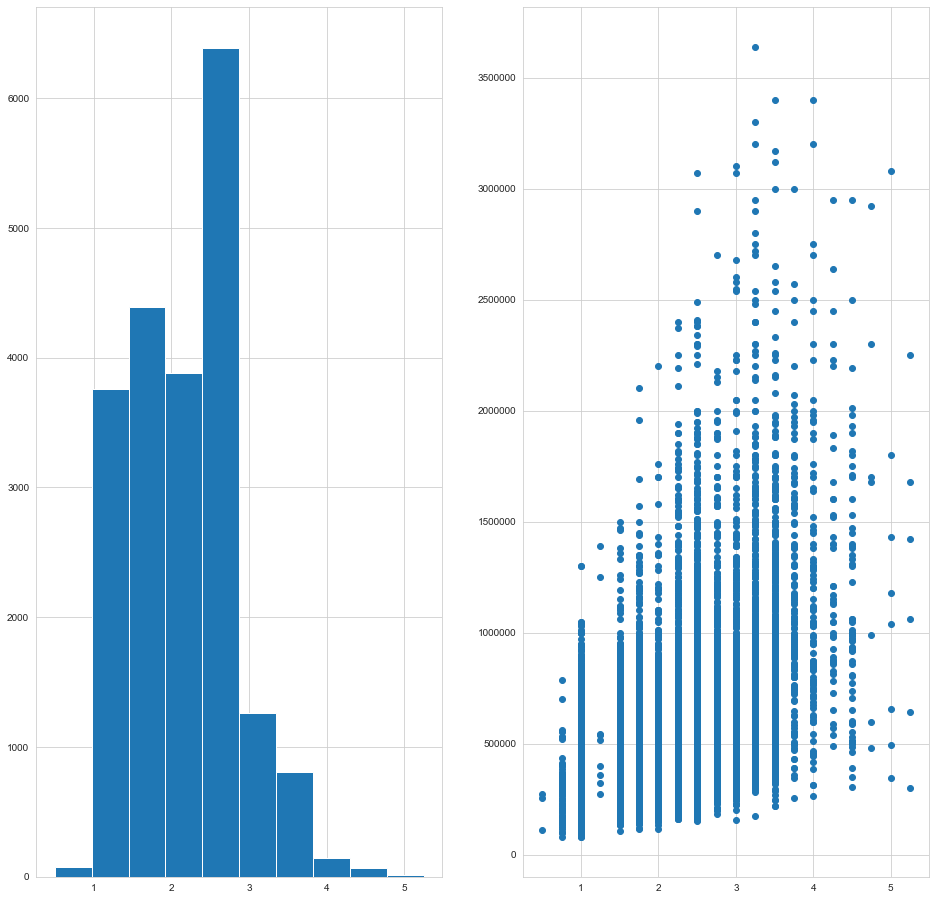

In [108]:
check_column(kc2, 'bathrooms')

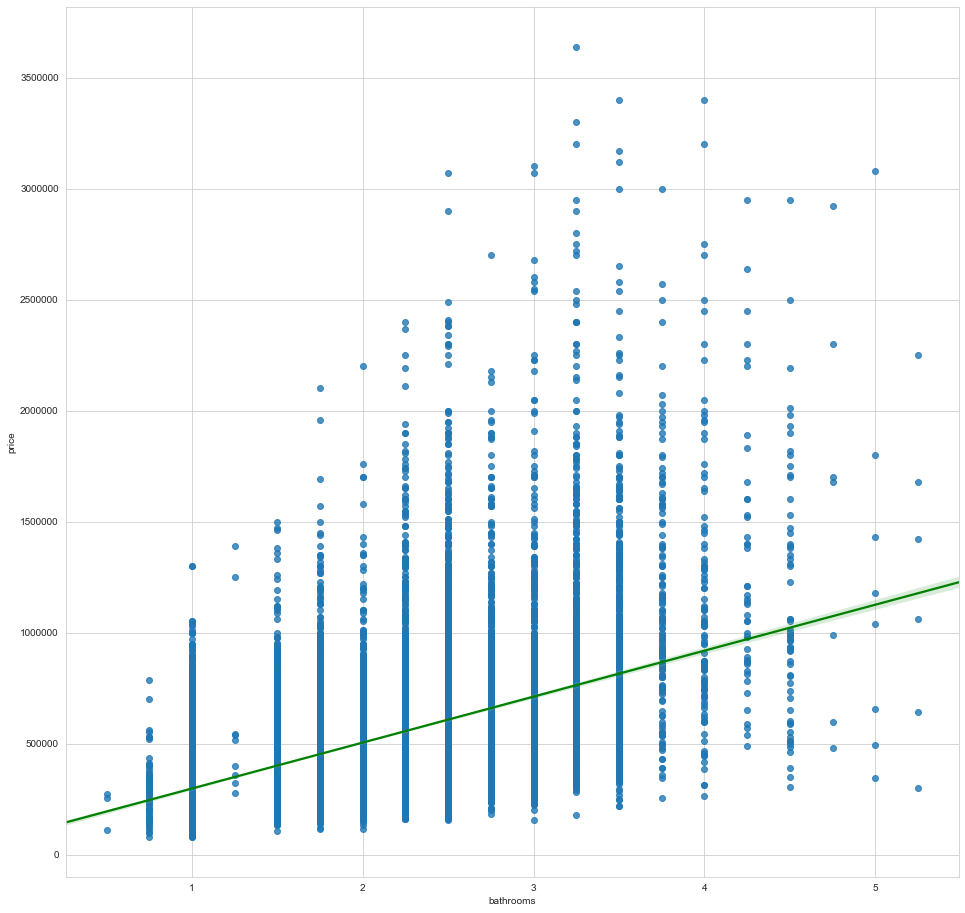

In [109]:
sns.regplot(kc2['bathrooms'], kc2['price'],line_kws={"color": "green"})

### sqft_lot 
no obvious correlation obvious outliers

DataType:
	 int64
Null Values Present = 0


count      20787.000
mean       14632.071
std        39749.958
min          520.000
25%         5023.000
50%         7575.000
75%        10500.000
max      1651359.000
Name: sqft_lot, dtype: float64


Value Counts:


5000     0.016597
6000     0.013614
4000     0.011690
7200     0.010391
7500     0.005580
           ...   
41300    0.000048
17377    0.000048
58341    0.000048
3048     0.000048
53250    0.000048
Name: sqft_lot, Length: 9456, dtype: float64

(<Figure size 1152x1152 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E0DC940908>,
       dtype=object))

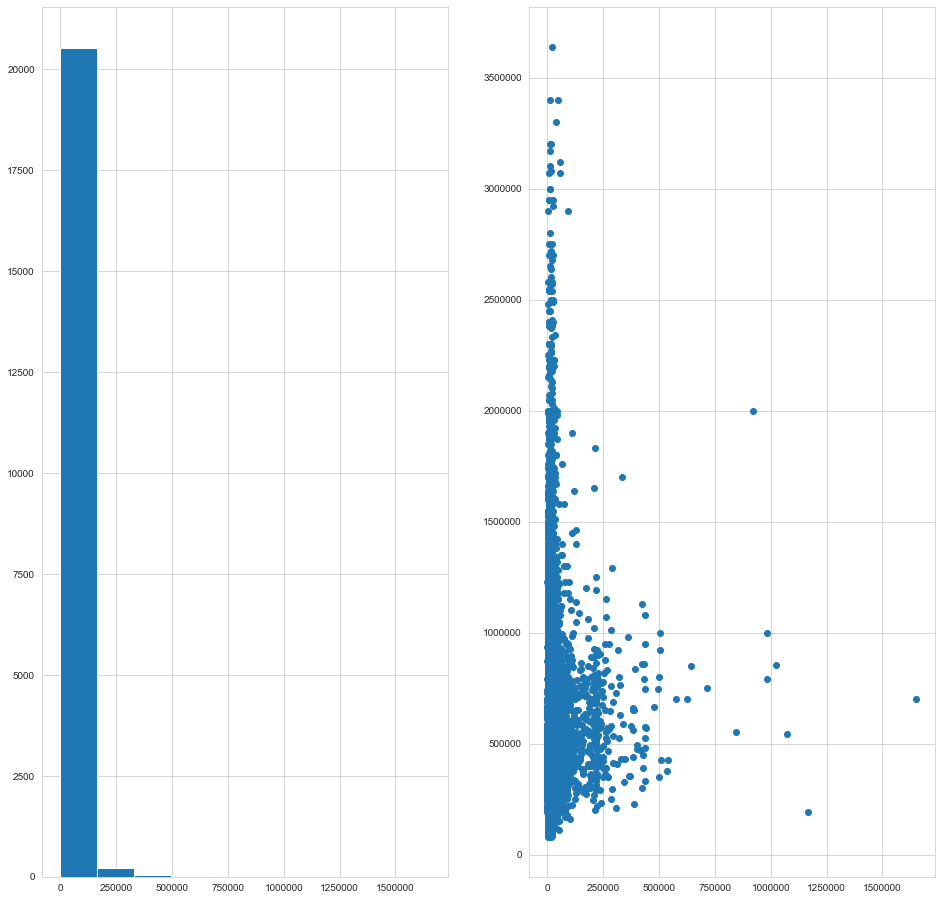

In [110]:
check_column(kc2, 'sqft_lot')

### Sft_lot15  

very skewed distribution, no visual correlation, obvious outliers

DataType:
	 int64
Null Values Present = 0


count     20787.000
mean      12410.957
std       25356.802
min         651.000
25%        5100.000
50%        7600.000
75%       10000.000
max      560617.000
Name: sqft_lot15, dtype: float64


Value Counts:


5000     0.019916
4000     0.016741
6000     0.013566
7200     0.009814
4800     0.006687
           ...   
15070    0.000048
6890     0.000048
35576    0.000048
9594     0.000048
6147     0.000048
Name: sqft_lot15, Length: 8420, dtype: float64

(<Figure size 1152x1152 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E0DDDB3208>,
       dtype=object))

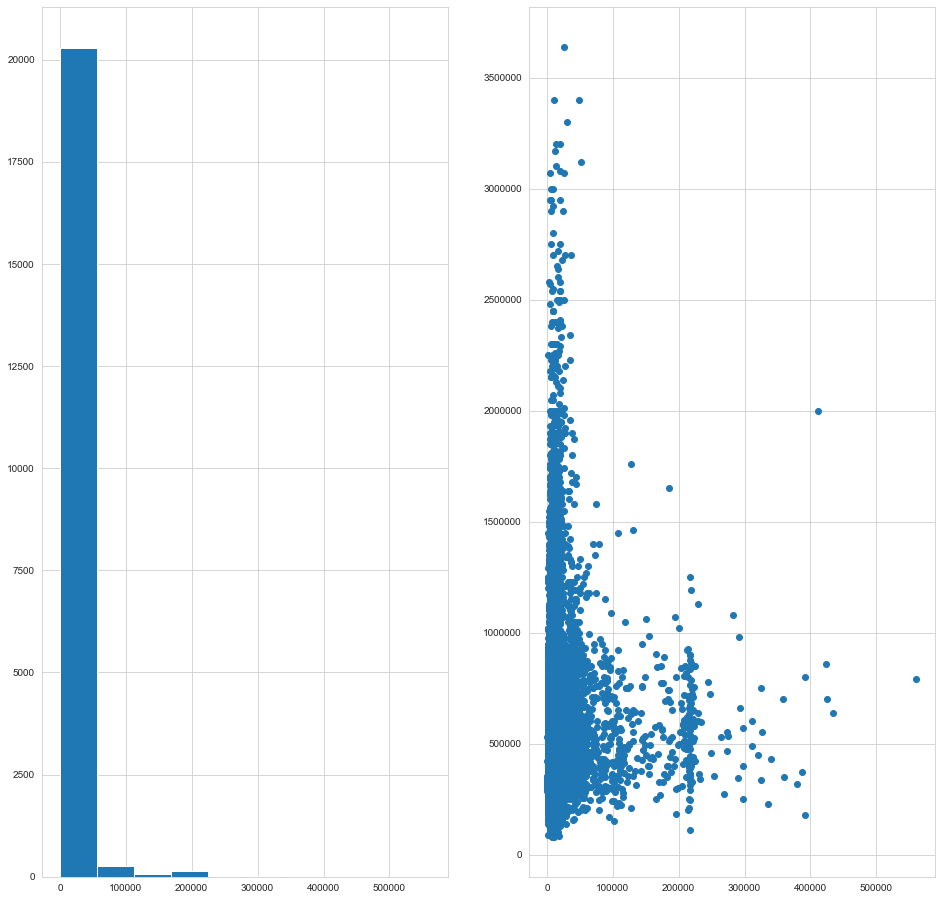

In [111]:
check_column(kc2, 'sqft_lot15')

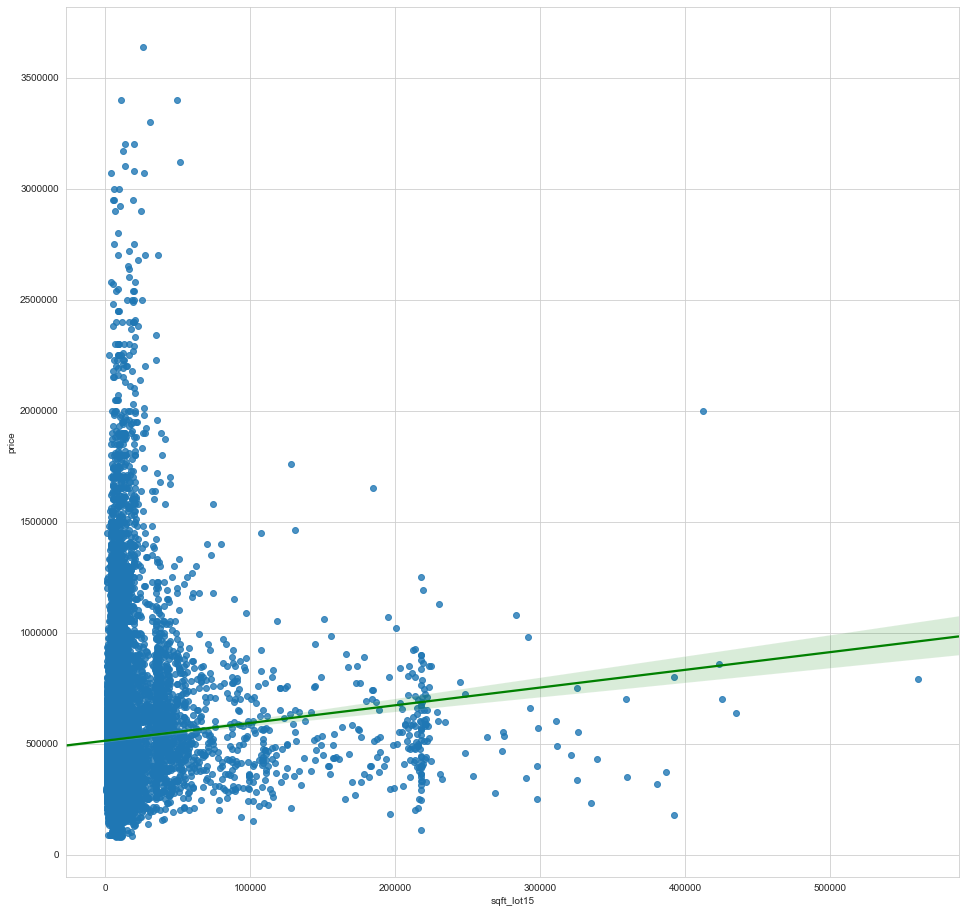

In [112]:
sns.regplot(kc2['sqft_lot15'], kc2['price'],line_kws={"color": "green"})

## Multicollinearity

Categorical Inspection:

No handles with labels found to put in legend.


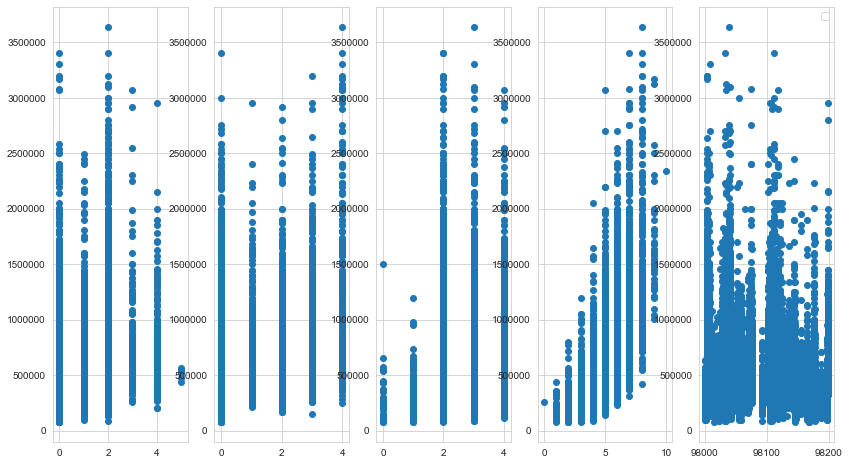

In [113]:
cols_to_plot = ['floors', 'view', 'condition', 'grade', 'zipcode']

fig, axes = plt.subplots(nrows=1,ncols=5, figsize=(14,8))

for i, col in enumerate(cols_to_plot):
    axes[i].scatter(x=kc2[col], y=kc2['price'])

plt.legend()
plt.show()


    
### Looking for high correlations between categories before transforming/modifying the data or making decisions

In [114]:
corr = kc2.corr().round(3)
corr

price  bedrooms  ...  sqft_living_zscore  bedrooms_z_score
price                   1.000     0.299  ...               0.343             0.063
bedrooms                0.299     1.000  ...              -0.014             0.143
bathrooms               0.484     0.511  ...               0.087            -0.008
sqft_living             0.656     0.600  ...               0.300             0.048
sqft_lot                0.071     0.025  ...               0.083            -0.003
floors                  0.255     0.174  ...               0.069            -0.040
view                    0.378     0.062  ...               0.136             0.040
condition               0.049     0.027  ...              -0.055            -0.001
grade                   0.657     0.354  ...               0.246            -0.063
sqft_above              0.555     0.486  ...               0.310            -0.010
sqft_basement           0.271     0.286  ...               0.022             0.111
yr_built                0.041     0.170  ...               0.017            -0.143
yr_renovated            0.123     0.013  ...               0.024             0.030
zipcode                -0.038    -0.160  ...               0.022             0.108
lat                     0.347    -0.021  ...               0.067             0.078
long                    0.016     0.142  ...               0.027            -0.097
sqft_living15           0.582     0.398  ...               0.241            -0.006
sqft_lot15              0.065     0.023  ...               0.077            -0.020
yr_reno                 0.123     0.013  ...               0.024             0.030
last_upgrade            0.085     0.176  ...               0.022            -0.136
yrs_since_last_upgrade -0.085    -0.176  ...              -0.022             0.136
zip_cats               -0.033    -0.158  ...               0.026             0.106
sqft_living_zscore      0.343    -0.014  ...               1.000             0.272
bedrooms_z_score        0.063     0.143  ...               0.272             1.000

[24 rows x 24 columns]

### Checking Visually

In [115]:
#checking visually:
def multiplot(corr, figsize=(16,16)):
    fig, ax = plt.subplots(figsize=figsize)
    
    mask = np.zeros_like(corr, dtype=np.bool)
    idx = np.triu_indices_from(mask)
    mask[idx] = True
    
    sns.heatmap(np.abs(corr),square=True, mask=mask, annot=True, cmap='Reds', ax=ax)
    return fig, ax

(<Figure size 1152x1152 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1e0dd570e80>)

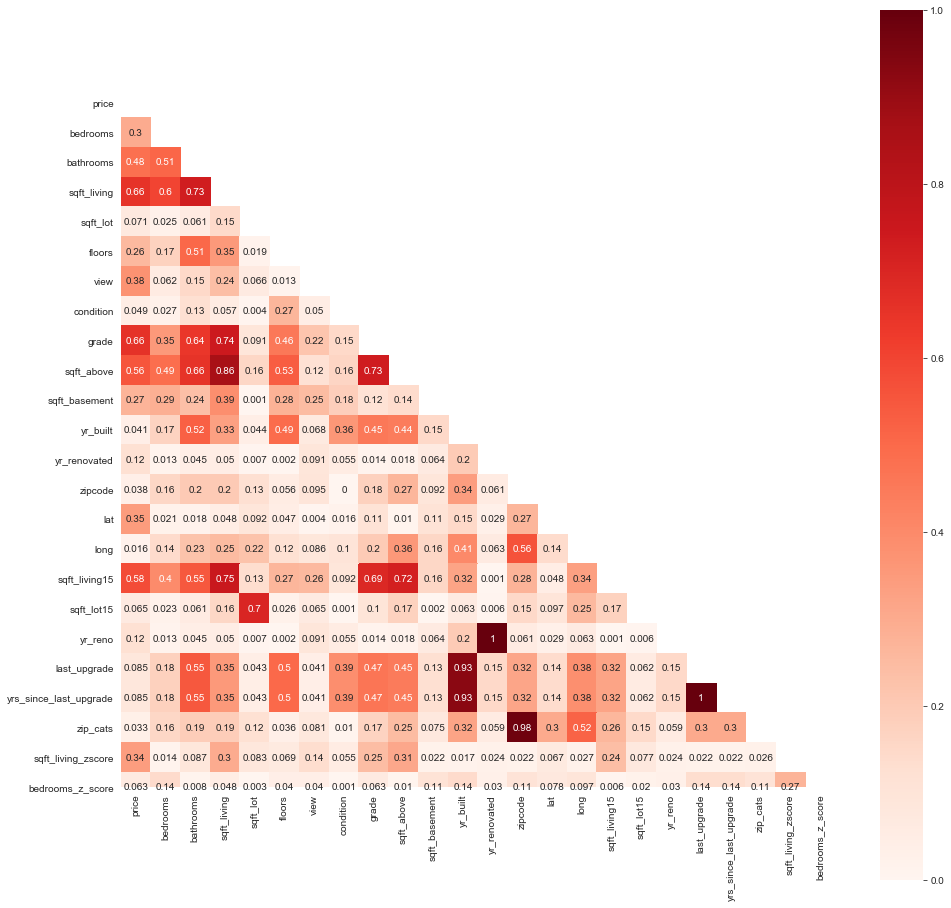

In [116]:
multiplot(np.abs(kc2.corr().round(3)))

### Observations :

**Highly correlated variables:**
    - sqft_living - This one was highly correlated directly to price, on the fence about dropping it - might go down if I drop other things like sqft_living15 which is also highly correlated but less correlated to price 
    - grade - This factor was highly correlated directly to price, on the fence about dropping it - might go down if I drop some others
**dropping based on initial  based on high multicollinearity correlation (mc)**...
  
    -sqft_above
    -sqft_living15
    -yr_reno
    -last_upgrade
    

**Other Columns/ Features to drop and rationale**

    -Dropping id -since it has no value associated with it by definition
    -Dropping zipcode since it was replaced by zip_cats
    -Dropping bedrooms_z_score and sqft_living_zscore since they are for determining outliers only


In [117]:
drop_cols = ['sqft_above','sqft_living15', 'yr_reno', 'last_upgrade', 'zipcode', 'bedrooms_z_score',
            'sqft_living_zscore']
kc2.drop(drop_cols,axis=1,inplace=True)

(<Figure size 1440x1440 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1e0df68c908>)

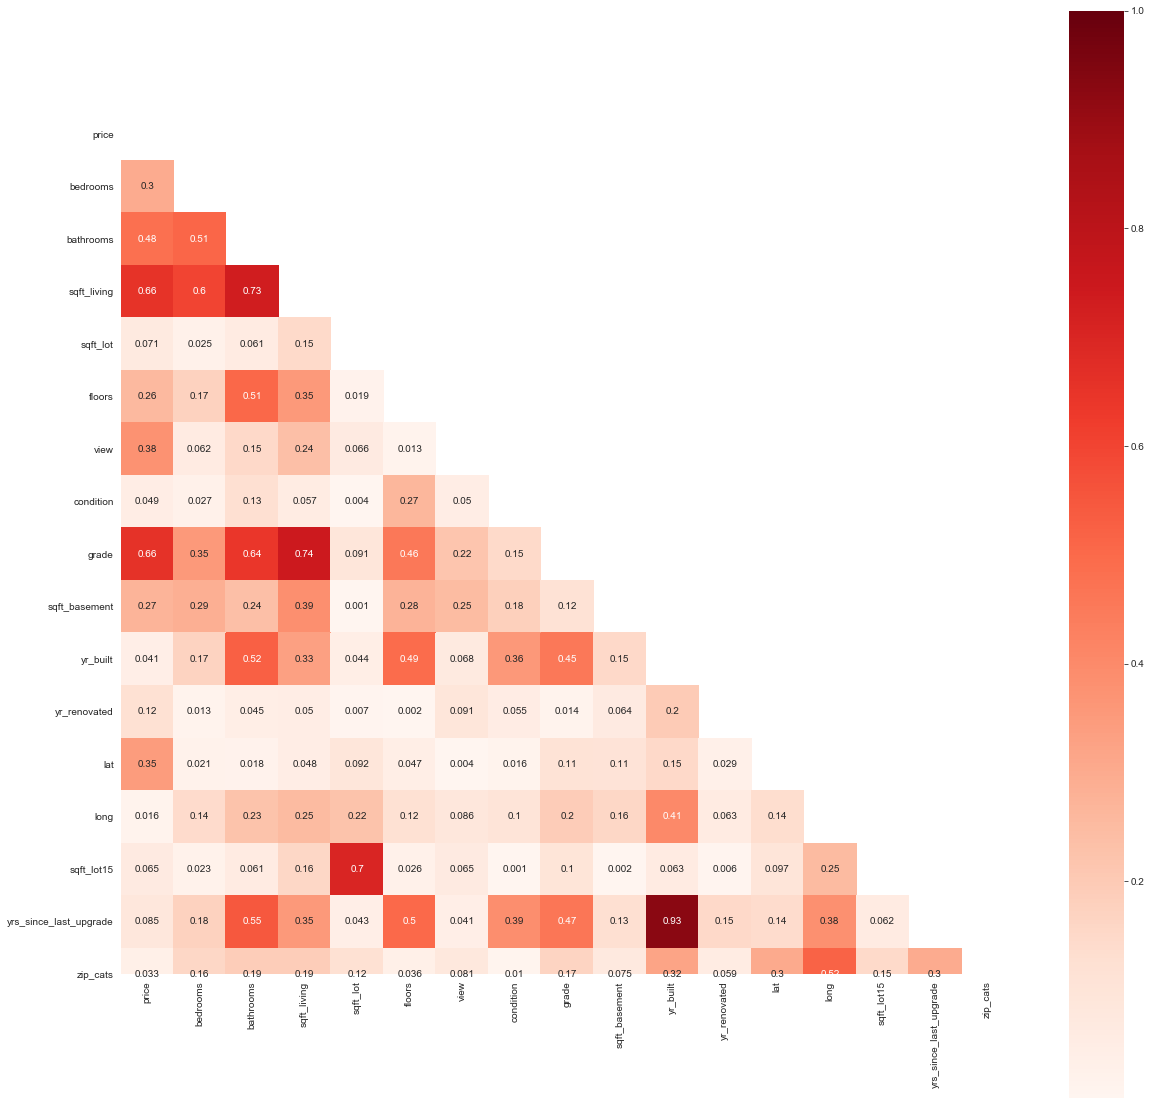

In [118]:
multiplot(np.abs(kc2.corr().round(3)), figsize=(20,20))


### additional observations after first drop:

**Keeping, despite high mc:**

    grade, and  
    sqft_living 
    
   both are correlated with price

**Dropping**

yr_built since it's captured in yrs_since_last_upgrade



In [119]:
drop_cols = ['yr_built']
kc2.drop(drop_cols,axis=1,inplace=True)

(<Figure size 1440x1440 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1e0df502eb8>)

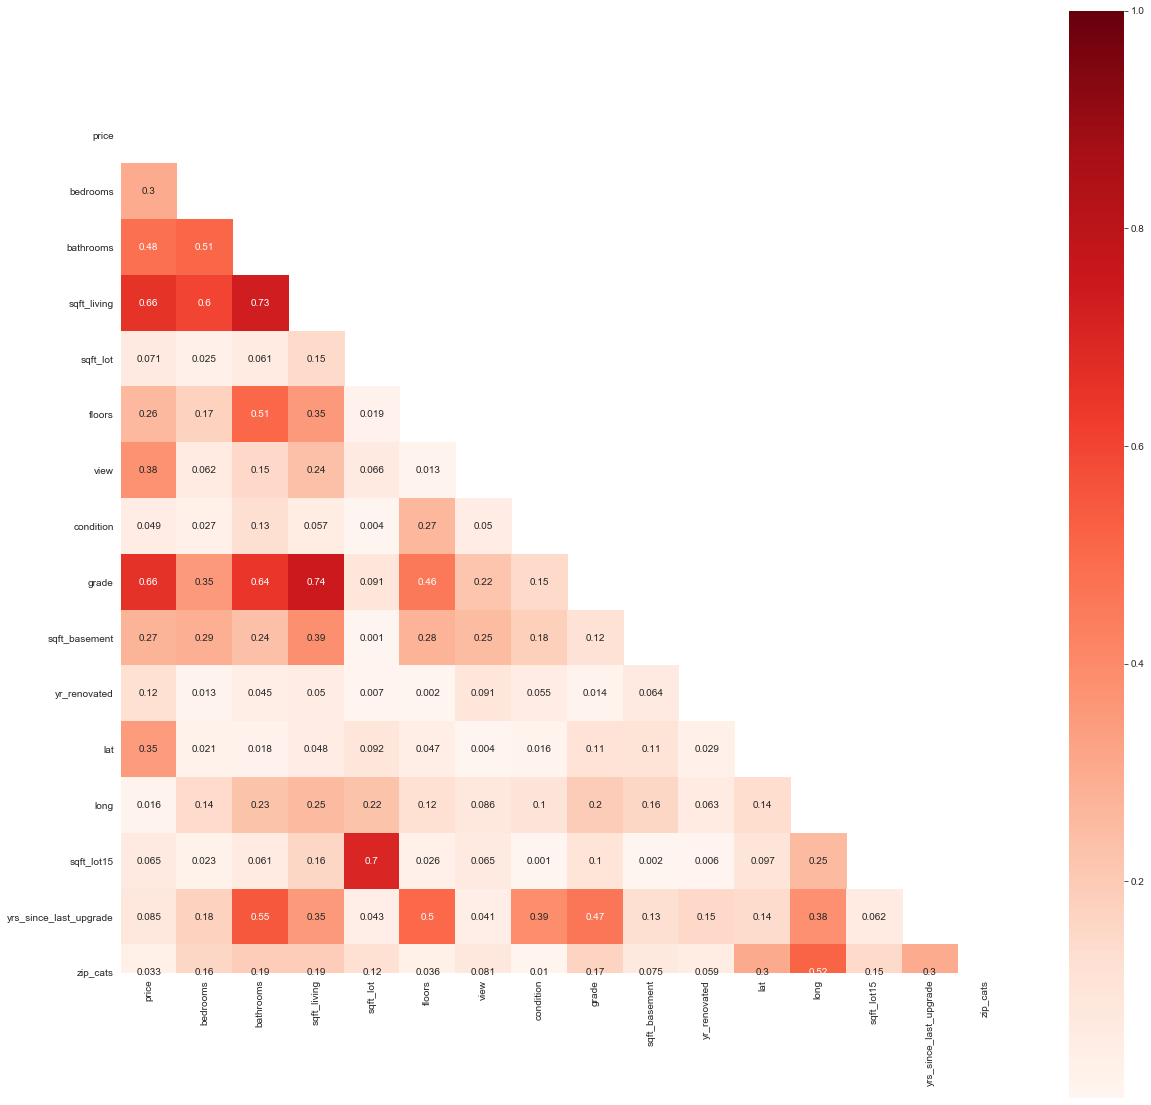

In [120]:
multiplot(np.abs(kc2.corr().round(3)), figsize=(20,20))

## Observations after multicollinearity and looking at price after further data cleaning and dropping outliers based on factors other than price:

These look better even though grade and sqft living are both equally correlated and rather high


### Price 
    Mean - $522K seems about right,  Min$78K Max; $3.6M 50% is $449K so close to mean... seems normal.

DataType:
	 float64
Null Values Present = 0


count      20787.000
mean      522932.483
std       311864.472
min        78000.000
25%       320000.000
50%       449500.000
75%       635000.000
max      3640000.000
Name: price, dtype: float64


Value Counts:


350000.0    0.007986
450000.0    0.007841
550000.0    0.007408
500000.0    0.007168
425000.0    0.007024
              ...   
641200.0    0.000048
739500.0    0.000048
418900.0    0.000048
234975.0    0.000048
884744.0    0.000048
Name: price, Length: 3527, dtype: float64

(<Figure size 1152x1152 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E0DCFC5550>,
       dtype=object))

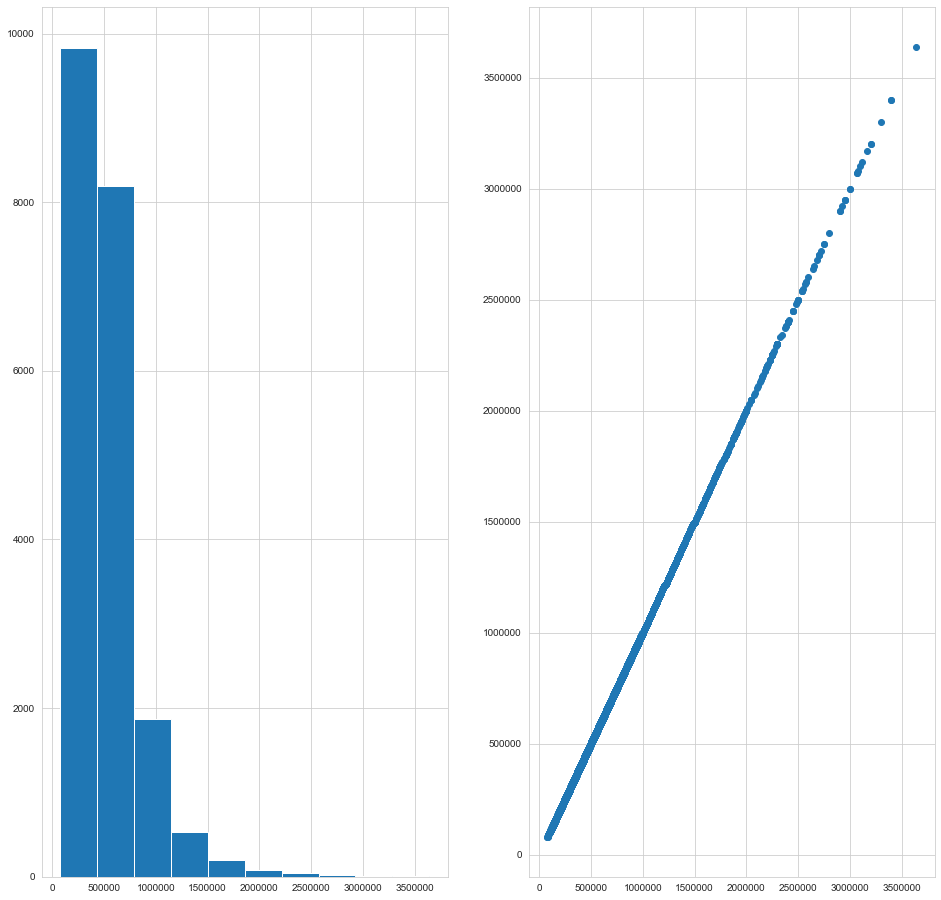

In [121]:
check_column(kc2, 'price')

## Normalizing

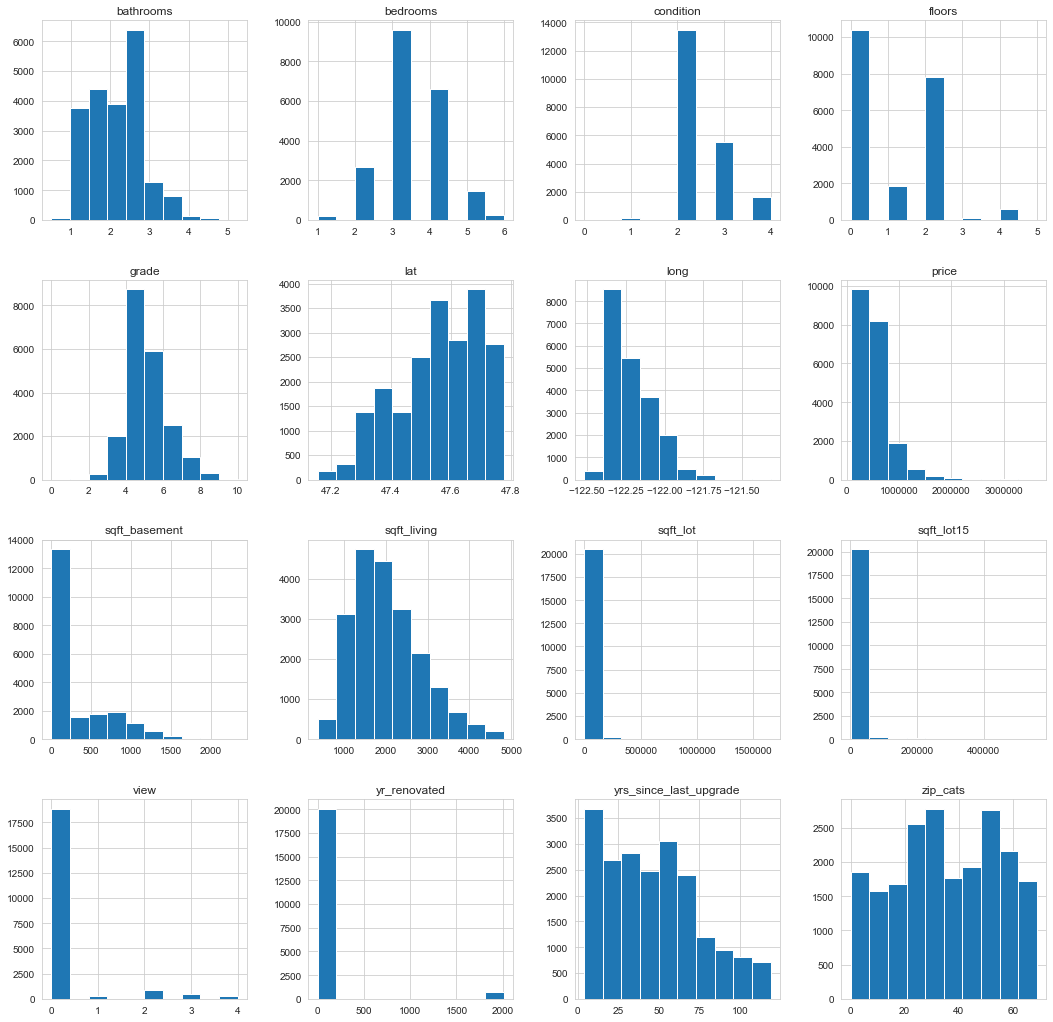

In [122]:
kc2.hist(figsize=(18,18));

## observations on distributions:  

Normal Distributions:
Grade 

Skewed: 
sqft_living - do I normalize this?


Leaving the rest alone to see how it works first round.





In [123]:
kc['date'].describe()

count                   21082
unique                    371
top       2014-06-23 00:00:00
freq                      139
first     2014-05-02 00:00:00
last      2015-05-27 00:00:00
Name: date, dtype: object

In [124]:
#code to log transform for normalization, tried logging 'sqft_living'
## results = R2d = 0.672 kurtosis 5.86, skew 1.023
#log_cols = ['sqft_living']

#for col in log_cols:
    #kc2[col+ '_log'] = np.log(kc2[col])

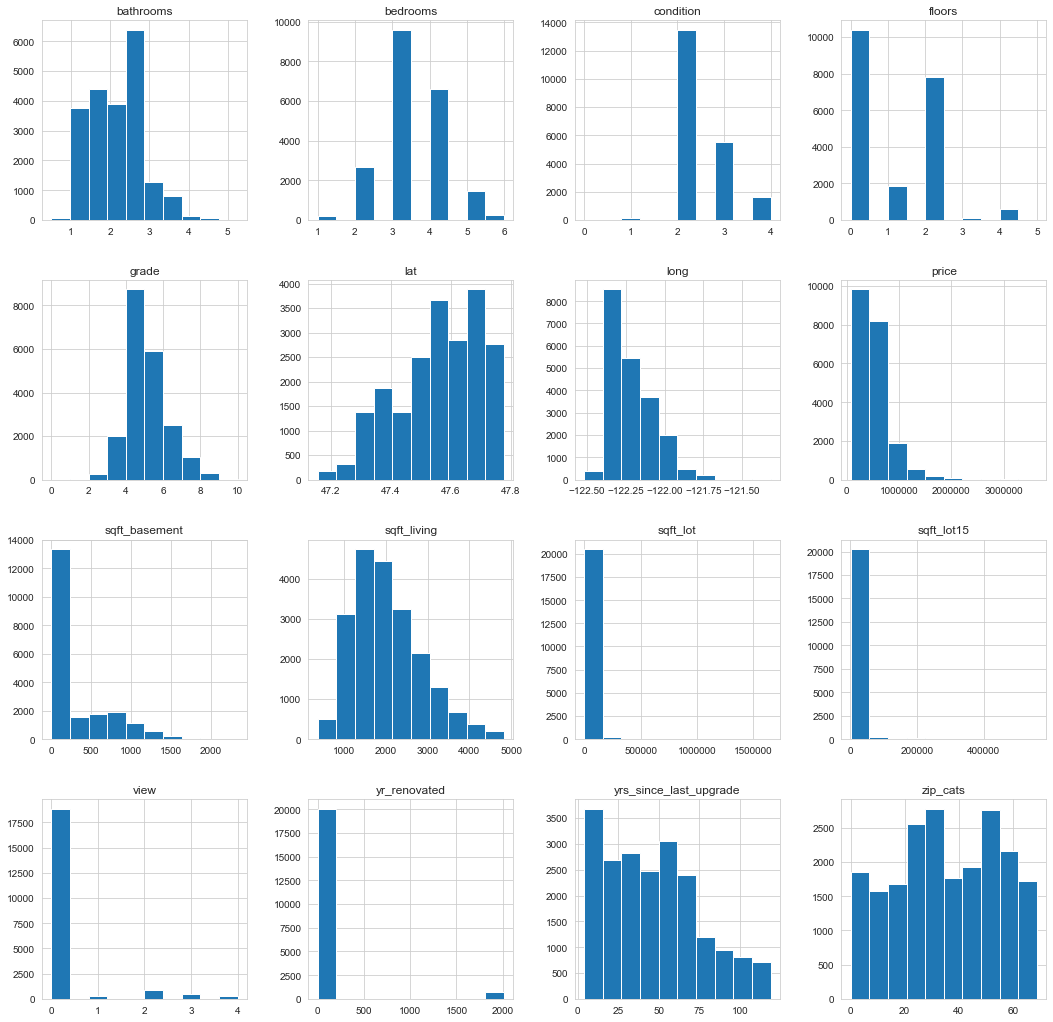

In [125]:
kc2.hist(figsize=(18,18));

Observations: that helped the distribution for sqft_living, so this time keeping sqft_living ::: 
**dropping sqft_living:** and using sqft_log
also **forgot to drop yr_renovated... so doing that now:**

In [ ]:
drop_cols = ['yr_renovated']
kc2.drop(drop_cols,axis=1,inplace=True)

In [127]:

drop_cols = ['date']
kc2.drop(drop_cols,axis=1,inplace=True)

(<Figure size 1440x1440 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2536df2d940>)

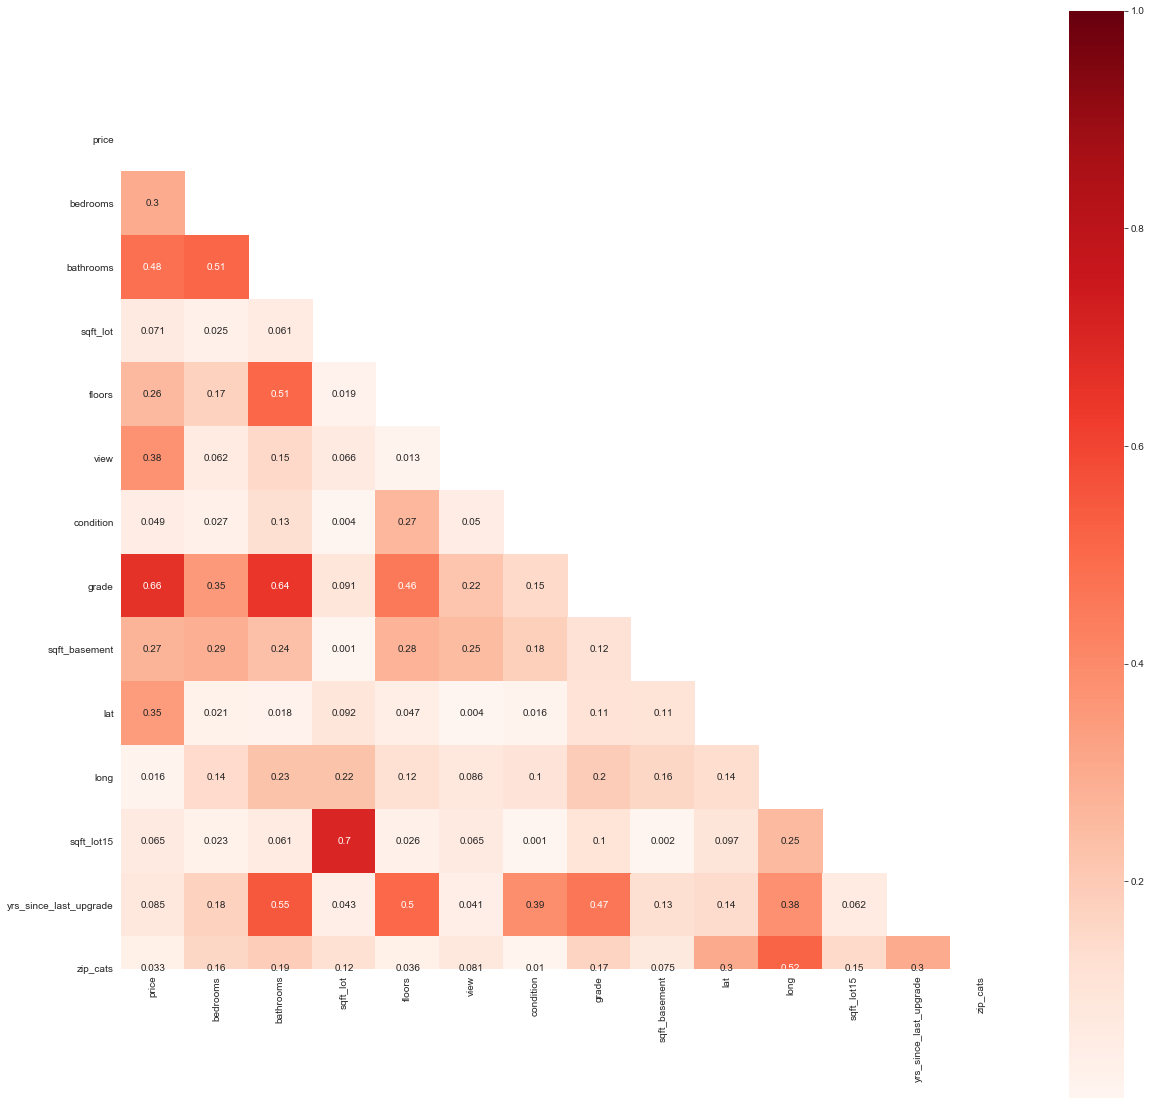

In [128]:
multiplot(np.abs(kc2.corr().round(3)), figsize=(20,20))

## Scaling

In [129]:
kc2.head()

price  bedrooms  ...  zip_cats  sqft_living_log
0  221900.0         3  ...        66         7.073270
1  538000.0         3  ...        55         7.851661
2  180000.0         2  ...        16         6.646391
3  604000.0         4  ...        58         7.580700
4  510000.0         3  ...        37         7.426549

[5 rows x 15 columns]

### reminder on cat cols from 5.2 :
- floors -assigned category code
- view - assigned category code

 - condition - assigned category code
- grade - assigned category code
- zipcode - assigned a category code after evaluation.





In [130]:
cat_cols = ['floors', 'view', 'condition', 'grade', 'zip_cats']

In [131]:
num_cols = ['bedrooms', 'bathrooms', 'sqft_lot', 'sqft_basement', 'lat', 'long', 'sqft_lot15', 
           'yrs_since_last_upgrade', 'zip_cats', 'sqft_living_log']

In [132]:
from sklearn.preprocessing import StandardScaler
#scaling num_cols, then cat_cols
scaler = StandardScaler()
scaled_data = scaler.fit_transform(kc2[num_cols])

In [133]:
scaled_data = scaler.fit_transform(kc2[cat_cols])

## Dropping

In [ ]:
#code to drop anything else that will pull away from model:



# Model

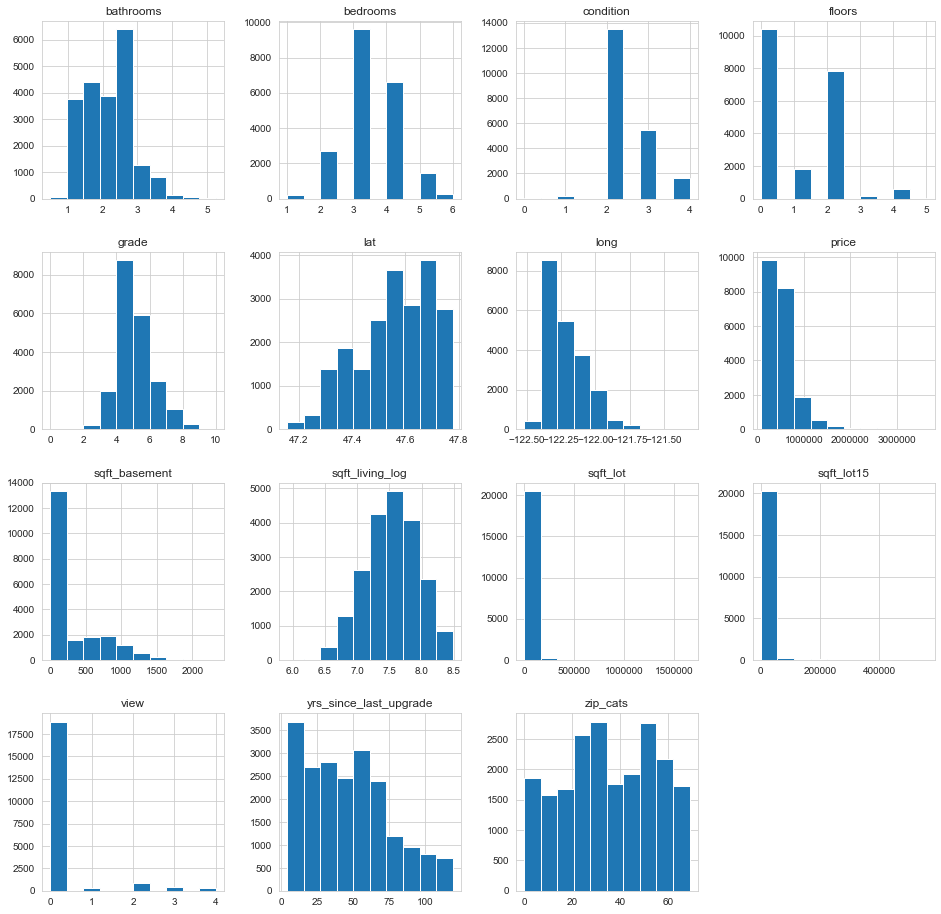

In [134]:
kc2.hist(figsize=(16,16));

In [135]:
kc2.head()

price  bedrooms  ...  zip_cats  sqft_living_log
0  221900.0         3  ...        66         7.073270
1  538000.0         3  ...        55         7.851661
2  180000.0         2  ...        16         6.646391
3  604000.0         4  ...        58         7.580700
4  510000.0         3  ...        37         7.426549

[5 rows x 15 columns]

In [136]:
# Importing necessary tools
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf

In [137]:
#building calling the appropriate columns to build model with:
cols = kc2.drop(['price', 'sqft_basement', 'sqft_lot15'], axis=1).columns
str_cols = '  + '.join(cols)
str_cols
#after first round of testing dropped sqft_basement Pvalue .954
#after second round of testing dropped sqft_lot 15 pvalue was .253

## taking out categories I'm not sure how to handle:
#zipcode, lat, long, last_upgrade, zip_cats

##dropping condition from initial inspection and sft_basement

'bedrooms  + bathrooms  + sqft_lot  + floors  + view  + condition  + grade  + lat  + long  + yrs_since_last_upgrade  + zip_cats  + sqft_living_log'

In [138]:
#build formula
formula = 'price~' + str_cols
formula

'price~bedrooms  + bathrooms  + sqft_lot  + floors  + view  + condition  + grade  + lat  + long  + yrs_since_last_upgrade  + zip_cats  + sqft_living_log'

In [139]:
#modeling
model = smf.ols(formula=formula, data=kc2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     3104.
Date:                Tue, 12 Nov 2019   Prob (F-statistic):               0.00
Time:                        11:57:22   Log-Likelihood:            -2.8178e+05
No. Observations:               20787   AIC:                         5.636e+05
Df Residuals:                   20774   BIC:                         5.637e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -4.713e+07   1.52e+06    -30.990      0.000   -5.01e+07   -4.41e+07
bedrooms               -1.754e+04   2019.256     -8.689      0.000   -2.15e+04   -1.36e+04
bathrooms                5.08e+04   3123.565     16.262      0.000    4.47e+04    5.69e+04
sqft_lot                   0.1406      0.034      4.144      0.000       0.074       0.207
floors                  8530.1060   1527.935      5.583      0.000    5535.234    1.15e+04
view                    8.633e+04   1861.361     46.381      0.000    8.27e+04       9e+04
condition               2.556e+04   2213.188     11.550      0.000    2.12e+04    2.99e+04
grade                    1.23e+05   1873.927     65.626      0.000    1.19e+05    1.27e+05
lat                     6.139e+05   1.01e+04     60.581      0.000    5.94e+05    6.34e+05
long                   -1.336e+05   1.16e+04    -11.547      0.000   -1.56e+05   -1.11e+05
yrs_since_last_upgrade  2336.4461     66.885     34.933      0.000    2205.347    2467.545
zip_cats               -1402.8293     83.980    -16.704      0.000   -1567.436   -1238.223
sqft_living_log         1.803e+05   6398.176     28.180      0.000    1.68e+05    1.93e+05
==============================================================================
Omnibus:                    12557.742   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           245307.899
Skew:                           2.546   Prob(JB):                         0.00
Kurtosis:                      19.041   Cond. No.                     4.98e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.98e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Fit Testing: QQ Plot and Scatter

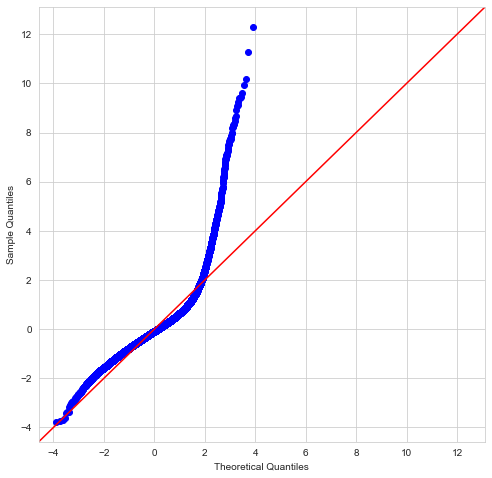

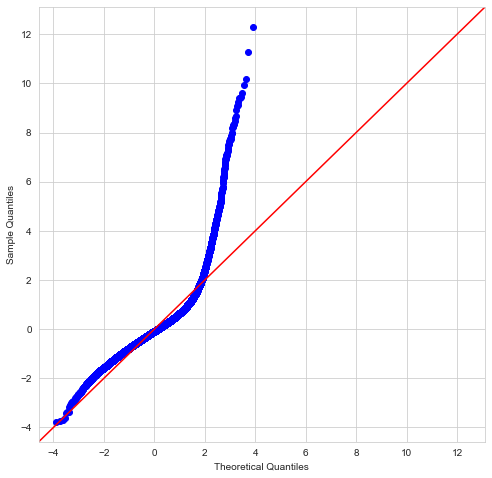

In [160]:
resids = model.resid
import scipy.stats as stats

mpl.rcParams['figure.figsize'] = (8,8)
sm.graphics.qqplot(resids, stats.norm, line = '45', fit=True)


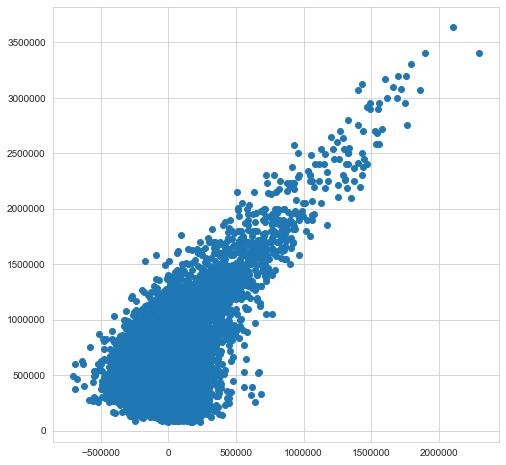

In [180]:
plt.scatter(resids, kc2['price'])

## Looking at price again

In [182]:
## going to try looking for outliers in price
z_score4 = np.abs(stats.zscore(kc2['price']))

In [183]:
kc2['price_z_score'] = z_score4

In [184]:
kc4 = kc2.loc[kc2['price_z_score'] < 3 ]

### check_column to modify for my filtered dataset: 

In [187]:
def check_column(df, col_name, n_unique=10):
    """Displays info on null values, datatype, unqiue values
    and displays .describe()
    
    Args:
        df (df): contains the columns
        col_name (str): name of the df column to show
        n_unique (int): Number of unique values top show.
    
    Return:
        fig, ax (Matplotlib Figure and Axes)
    """
    
    print('DataType:')
    print('\t',df[col_name].dtypes)
    
    num_nulls = df[col_name].isna().sum()
    print(f'Null Values Present = {num_nulls}')
    
    display(df[col_name].describe().round(3))
    
    print('\nValue Counts:')
    display(df[col_name].value_counts(n_unique)) 
    
 
    
    ## Add some EDA figures
    fig, ax = plt.subplots(ncols=2);
    
    df[col_name].hist(ax=ax[0])
    ax[1].scatter(df[col_name], kc4['price'])
    
    return fig,ax

#check_column(df,'condition')

DataType:
	 float64
Null Values Present = 0


count      20389.000
mean      496017.830
std       240570.139
min        78000.000
25%       319000.000
50%       442000.000
75%       620000.000
max      1450000.000
Name: price, dtype: float64


Value Counts:


350000.0    0.008142
450000.0    0.007995
550000.0    0.007553
500000.0    0.007308
425000.0    0.007161
              ...   
641200.0    0.000049
739500.0    0.000049
418900.0    0.000049
234975.0    0.000049
884744.0    0.000049
Name: price, Length: 3417, dtype: float64

(<Figure size 576x576 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001EE3542BDA0>,
       dtype=object))

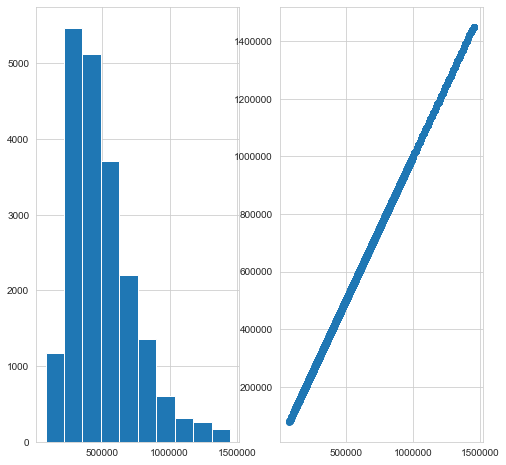

In [188]:
check_column(kc4, 'price')

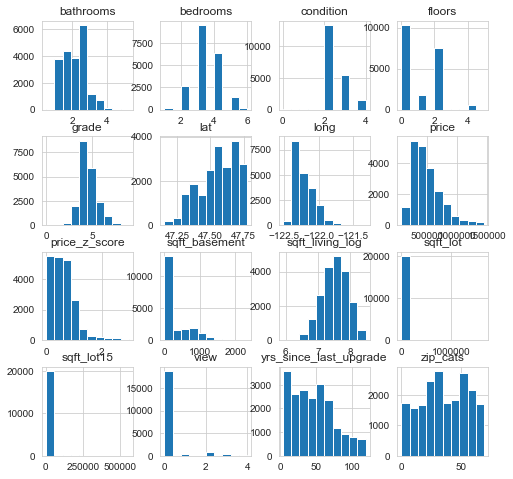

In [191]:
kc4.hist();

## mulitcolinarity with price modified:

In [193]:
corr = kc4.corr().round(3)
corr

price  bedrooms  ...  sqft_living_log  price_z_score
price                   1.000     0.309  ...            0.609          0.387
bedrooms                0.309     1.000  ...            0.635          0.079
bathrooms               0.473     0.505  ...            0.736          0.102
sqft_lot                0.079     0.026  ...            0.132          0.005
floors                  0.273     0.168  ...            0.352          0.020
view                    0.295     0.046  ...            0.176          0.189
condition               0.039     0.025  ...           -0.056          0.027
grade                   0.654     0.345  ...            0.708          0.205
sqft_basement           0.256     0.285  ...            0.383          0.056
lat                     0.404    -0.028  ...            0.021         -0.159
long                    0.044     0.147  ...            0.271         -0.034
sqft_lot15              0.070     0.024  ...            0.148         -0.002
yrs_since_last_upgrade -0.091    -0.177  ...           -0.378          0.005
zip_cats               -0.007    -0.155  ...           -0.205         -0.056
sqft_living_log         0.609     0.635  ...            1.000          0.134
price_z_score           0.387     0.079  ...            0.134          1.000

[16 rows x 16 columns]

(<Figure size 1152x1152 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1ee5b34e780>)

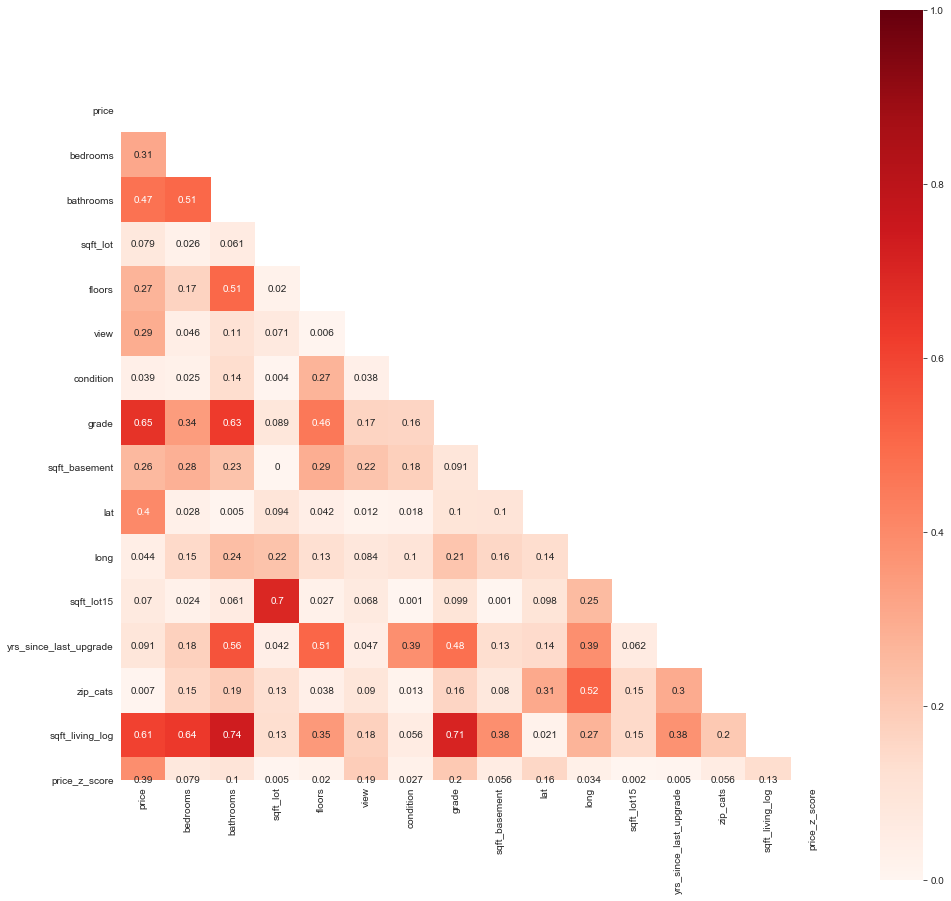

In [194]:
multiplot(np.abs(kc4.corr().round(3)))

## Model with Price outliers removed:

In [205]:
cols = kc4.drop(['price', 'sqft_basement', 'sqft_lot15', 'price_z_score'], axis=1).columns
str_cols = '  + '.join(cols)
str_cols

'bedrooms  + bathrooms  + sqft_lot  + floors  + view  + condition  + grade  + lat  + long  + yrs_since_last_upgrade  + zip_cats  + sqft_living_log'

In [206]:
#build formula
formula = 'price~' + str_cols
formula

'price~bedrooms  + bathrooms  + sqft_lot  + floors  + view  + condition  + grade  + lat  + long  + yrs_since_last_upgrade  + zip_cats  + sqft_living_log'

In [207]:
#modeling
model = smf.ols(formula=formula, data=kc4).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     3471.
Date:                Tue, 12 Nov 2019   Prob (F-statistic):               0.00
Time:                        13:26:26   Log-Likelihood:            -2.7022e+05
No. Observations:               20389   AIC:                         5.405e+05
Df Residuals:                   20376   BIC:                         5.406e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -3.732e+07   1.13e+06    -32.984      0.000   -3.95e+07   -3.51e+07
bedrooms               -1.291e+04   1509.780     -8.553      0.000   -1.59e+04   -9953.757
bathrooms               3.099e+04   2354.039     13.164      0.000    2.64e+04    3.56e+04
sqft_lot                   0.1823      0.026      7.148      0.000       0.132       0.232
floors                  1.235e+04   1143.441     10.799      0.000    1.01e+04    1.46e+04
view                    5.449e+04   1481.953     36.768      0.000    5.16e+04    5.74e+04
condition               2.367e+04   1654.099     14.312      0.000    2.04e+04    2.69e+04
grade                    9.71e+04   1427.356     68.026      0.000    9.43e+04    9.99e+04
lat                     5.827e+05   7516.989     77.515      0.000    5.68e+05    5.97e+05
long                   -6.692e+04   8599.820     -7.782      0.000   -8.38e+04   -5.01e+04
yrs_since_last_upgrade  1881.3785     50.410     37.322      0.000    1782.572    1980.185
zip_cats                -820.3466     62.909    -13.040      0.000    -943.653    -697.040
sqft_living_log         1.757e+05   4777.068     36.782      0.000    1.66e+05    1.85e+05
==============================================================================
Omnibus:                     3873.662   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10511.451
Skew:                           1.023   Prob(JB):                         0.00
Kurtosis:                       5.861   Cond. No.                     4.93e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.93e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

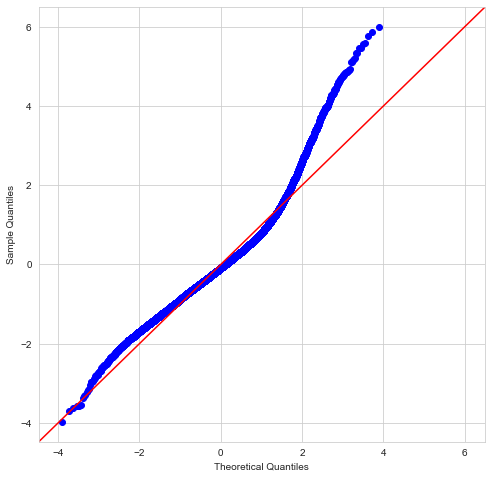

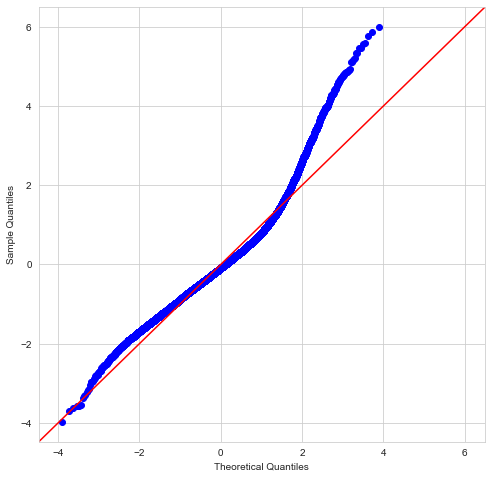

In [208]:
resids = model.resid
import scipy.stats as stats

mpl.rcParams['figure.figsize'] = (8,8)
sm.graphics.qqplot(resids, stats.norm, line = '45', fit=True)

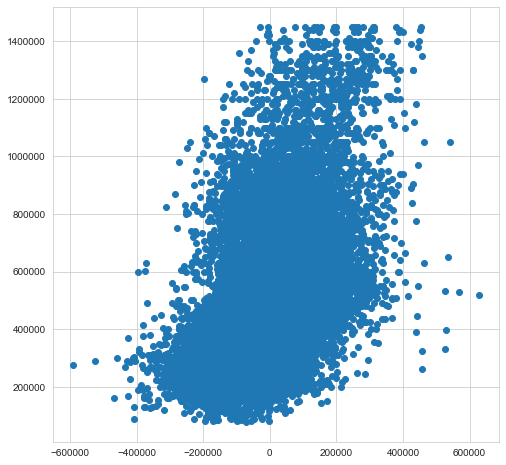

In [203]:
plt.scatter(resids, kc4['price'])

## Feature Ranking: 

In [204]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

predictors = model

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=3)
selector = selector.fit(predictors, model['price'])

TypeError: 'RegressionResultsWrapper' object is not subscriptable

In [164]:
def scatter_mean(df, col_name):
   """Plot a scatter . plot """
   ax = model.summary(kind='scatter', x=model, y=kc2['price'], figsize=figsize)

## Validation

In [ ]:
#from sklearn.metrics import mean_squared_error
#from sklearn.model_selection import cross_val_score
#from sklearn.linear_model import LinearRegression
#linreg = LinearRegression()

#x = kc.drop('price', axis=1).values
#y = kc('price').values

#kc_10_results = np.mean(cross_val_score(linreg, x, y, cv=10, scoring='r2'))

# Interpretation

# Conclusions and Recommendations:

# Annex: 

## Year_Reno value count sum = 722 out of 20,700 total 3.5%

In [171]:
kc['yr_reno'].value_counts().sum()

21082

In [172]:
kc3 = kc.loc[kc['yr_reno'] > 0]

In [174]:
kc3['yr_reno'].value_counts().sum()

722